In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
d1 = pd.read_csv('Inflow_outflow.txt', sep = "\t")
d2 = pd.read_csv('Products_ActBalance.txt', sep="\t")
d3 = pd.read_csv('Sales_Revenue.txt', sep="\t")
d4 = pd.read_csv('Soc_Dem.txt', sep="\t")

In [3]:
d1.head(2)

Client  VolumeCred  VolumeCred_CA  TransactionsCred  TransactionsCred_CA  \
0    1017    0.005000       0.005000                 1                    1   
1    1456  364.772143     364.752857                 4                    3   

    VolumeDeb  VolumeDeb_CA  VolumeDebCash_Card  VolumeDebCashless_Card  \
0  118.046429    118.046429           25.000000               91.796429   
1  774.980000    774.980000           14.285714              497.444286   

   VolumeDeb_PaymentOrder  TransactionsDeb  TransactionsDeb_CA  \
0                0.000000               12                  12   
1              258.607143               28                  28   

   TransactionsDebCash_Card  TransactionsDebCashless_Card  \
0                         2                             9   
1                         1                            20   

   TransactionsDeb_PaymentOrder  
0                             0  
1                             5

In [4]:
d2.head(2)

Client  Count_CA  Count_SA  Count_MF  Count_OVD  Count_CC  Count_CL  \
0       1         1       NaN       NaN        1.0       NaN       NaN   
1       2         1       1.0       NaN        NaN       NaN       NaN   

     ActBal_CA    ActBal_SA  ActBal_MF  ActBal_OVD  ActBal_CC  ActBal_CL  
0  1333.802857          NaN        NaN         0.0        NaN        NaN  
1   110.768571  13326.19036        NaN         NaN        NaN        NaN

In [5]:
d3.head(2)

Client  Sale_MF  Sale_CC  Sale_CL  Revenue_MF  Revenue_CC  Revenue_CL
0    1094        0        1        0    0.000000    5.138571      0.0000
1    1484        1        0        1   25.609107    0.000000      8.7225

In [6]:
d4.head(2)

Client Sex  Age  Tenure
0     909   M   21      27
1    1217   M   38     165

In [7]:
#d1.info()

In [8]:
#d2.info()

In [9]:
#d3.info()

In [10]:
#d4.info()

In [11]:
d24 = pd.merge(d2,d4,on='Client')
d24.head(2)

Client  Count_CA  Count_SA  Count_MF  Count_OVD  Count_CC  Count_CL  \
0       1         1       NaN       NaN        1.0       NaN       NaN   
1       2         1       1.0       NaN        NaN       NaN       NaN   

     ActBal_CA    ActBal_SA  ActBal_MF  ActBal_OVD  ActBal_CC  ActBal_CL Sex  \
0  1333.802857          NaN        NaN         0.0        NaN        NaN   F   
1   110.768571  13326.19036        NaN         NaN        NaN        NaN   M   

   Age  Tenure  
0   51       7  
1   43     152

In [12]:
d124 = pd.merge(d24,d1,on='Client',how='left')
d124.head(2)

Client  Count_CA  Count_SA  Count_MF  Count_OVD  Count_CC  Count_CL  \
0       1         1       NaN       NaN        1.0       NaN       NaN   
1       2         1       1.0       NaN        NaN       NaN       NaN   

     ActBal_CA    ActBal_SA  ActBal_MF  ...    VolumeDeb  VolumeDeb_CA  \
0  1333.802857          NaN        NaN  ...  1891.353214   1335.619643   
1   110.768571  13326.19036        NaN  ...   386.442857    386.442857   

   VolumeDebCash_Card VolumeDebCashless_Card  VolumeDeb_PaymentOrder  \
0          250.000000             283.089286              247.607143   
1          307.142857              38.407143               35.714286   

   TransactionsDeb  TransactionsDeb_CA  TransactionsDebCash_Card  \
0             50.0                30.0                       3.0   
1              6.0                 6.0                       2.0   

   TransactionsDebCashless_Card  TransactionsDeb_PaymentOrder  
0                          12.0                           9.0  
1                           2.0                           1.0  

[2 rows x 30 columns]

In [13]:
#merging data left join
dfinal = pd.merge(d124,d3,on='Client',how='left')
dfinal.set_index("Client", inplace = True)
dfinal.head(2)

Count_CA  Count_SA  Count_MF  Count_OVD  Count_CC  Count_CL  \
Client                                                                
1              1       NaN       NaN        1.0       NaN       NaN   
2              1       1.0       NaN        NaN       NaN       NaN   

          ActBal_CA    ActBal_SA  ActBal_MF  ActBal_OVD  ...  \
Client                                                   ...   
1       1333.802857          NaN        NaN         0.0  ...   
2        110.768571  13326.19036        NaN         NaN  ...   

        TransactionsDeb_CA  TransactionsDebCash_Card  \
Client                                                 
1                     30.0                       3.0   
2                      6.0                       2.0   

       TransactionsDebCashless_Card  TransactionsDeb_PaymentOrder  Sale_MF  \
Client                                                                       
1                              12.0                           9.0      1.0   
2                               2.0                           1.0      0.0   

        Sale_CC  Sale_CL  Revenue_MF  Revenue_CC  Revenue_CL  
Client                                                        
1           0.0      0.0   26.972679         0.0         0.0  
2           0.0      0.0    0.000000         0.0         0.0  

[2 rows x 35 columns]

In [14]:
# converting sex variable into 1 and 0
# adding another varaible by combining balance and liability
# multiplying the liabaility column with -1 to have the negative effect on the target variable

dfinal['Sex'][dfinal['Sex']== 'M'] = int(1)
dfinal['Sex'][dfinal['Sex']== 'F'] = int(0)
#dfinal['Sex'] = dfinal.Sex.astype(int)
dfinal['ActBal_OVD'] = -1*(dfinal['ActBal_OVD'])
dfinal['ActBal_CC'] = -1*(dfinal['ActBal_CC'])
dfinal['ActBal_CL'] = -1*(dfinal['ActBal_CL'])

dfinal['Total_Bal'] = dfinal[['ActBal_CA', 'ActBal_SA', 'ActBal_MF', 'ActBal_CC','ActBal_CC']].sum(axis=1)
dfinal.head(2)

Count_CA  Count_SA  Count_MF  Count_OVD  Count_CC  Count_CL  \
Client                                                                
1              1       NaN       NaN        1.0       NaN       NaN   
2              1       1.0       NaN        NaN       NaN       NaN   

          ActBal_CA    ActBal_SA  ActBal_MF  ActBal_OVD  ...  \
Client                                                   ...   
1       1333.802857          NaN        NaN        -0.0  ...   
2        110.768571  13326.19036        NaN         NaN  ...   

        TransactionsDebCash_Card  TransactionsDebCashless_Card  \
Client                                                           
1                            3.0                          12.0   
2                            2.0                           2.0   

       TransactionsDeb_PaymentOrder  Sale_MF  Sale_CC  Sale_CL  Revenue_MF  \
Client                                                                       
1                               9.0      1.0      0.0      0.0   26.972679   
2                               1.0      0.0      0.0      0.0    0.000000   

        Revenue_CC  Revenue_CL     Total_Bal  
Client                                        
1              0.0         0.0   1333.802857  
2              0.0         0.0  13436.958931  

[2 rows x 36 columns]

In [15]:
# converting type object to numeric
dfinal["Sex"] = pd.to_numeric(dfinal["Sex"])

array([[<AxesSubplot:title={'center':'Count_CA'}>,
        <AxesSubplot:title={'center':'Count_SA'}>,
        <AxesSubplot:title={'center':'Count_MF'}>,
        <AxesSubplot:title={'center':'Count_OVD'}>,
        <AxesSubplot:title={'center':'Count_CC'}>,
        <AxesSubplot:title={'center':'Count_CL'}>],
       [<AxesSubplot:title={'center':'ActBal_CA'}>,
        <AxesSubplot:title={'center':'ActBal_SA'}>,
        <AxesSubplot:title={'center':'ActBal_MF'}>,
        <AxesSubplot:title={'center':'ActBal_OVD'}>,
        <AxesSubplot:title={'center':'ActBal_CC'}>,
        <AxesSubplot:title={'center':'ActBal_CL'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'VolumeCred'}>,
        <AxesSubplot:title={'center':'VolumeCred_CA'}>,
        <AxesSubplot:title={'center':'TransactionsCred'}>],
       [<AxesSubplot:title={'center':'TransactionsCred_CA'}>,
      

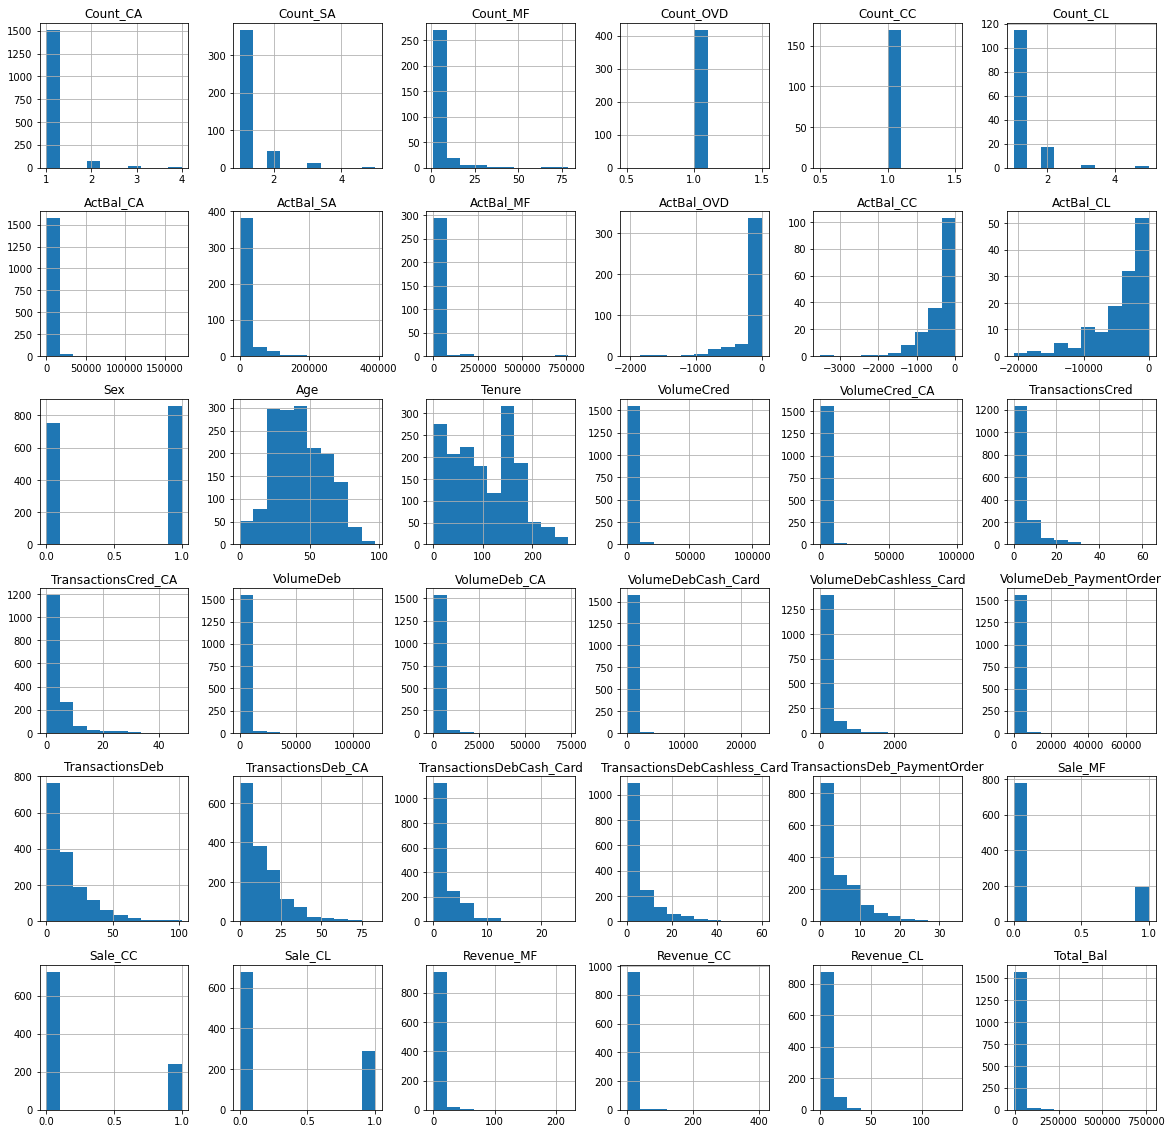

In [16]:
#plotting the histograms
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dfinal.hist(ax=ax)

# For Loan

In [17]:
# since there are rows where target label is nether 1 nor 0, so we are picking those rows only where we have some label

loan_data_pos = dfinal.loc[dfinal['Sale_CL'] == 1]
loan_data_neg = dfinal.loc[dfinal['Sale_CL'] == 0]
loan_data_pos['Target'] = np.ones(len(loan_data_pos))
loan_data_neg['Target'] = np.zeros(len(loan_data_neg))

fl = loan_data_pos
fl = fl.append(loan_data_neg, ignore_index=True)
fl = fl.append(loan_data_pos, ignore_index=True)
fl = fl.append(loan_data_pos, ignore_index=True)
fl = fl.drop(columns=["Sale_CL", "Revenue_CL"], axis=1)
fl.head(2)

Count_CA  Count_SA  Count_MF  Count_OVD  Count_CC  Count_CL    ActBal_CA  \
0         1       NaN       NaN        NaN       NaN       NaN  2492.146786   
1         1       2.0       4.0        1.0       NaN       NaN    22.967143   

     ActBal_SA   ActBal_MF  ActBal_OVD  ...  TransactionsDeb_CA  \
0          NaN         NaN         NaN  ...                29.0   
1  25325.43786  868.703571 -333.400714  ...                33.0   

   TransactionsDebCash_Card  TransactionsDebCashless_Card  \
0                       4.0                          12.0   
1                       1.0                          26.0   

   TransactionsDeb_PaymentOrder  Sale_MF  Sale_CC  Revenue_MF  Revenue_CC  \
0                           9.0      0.0      1.0         0.0    1.107143   
1                           6.0      0.0      0.0         0.0    0.000000   

      Total_Bal  Target  
0   2492.146786     1.0  
1  26217.108574     1.0  

[2 rows x 35 columns]

In [18]:
# finding correlation with target variable and features which have less than 10% correlation are removed
cor = fl.corr()

cols_to_rem = []
for idx, ele in enumerate(cor.iloc[-1,:]):
    #print(ele)
    if np.abs(ele) < 0.05 or np.isnan(ele):
        #print(idx, ele)
        cols_to_rem.append(idx)

        
print("Cols to be removed", cols_to_rem, len(cols_to_rem))
cor

Cols to be removed [3, 4, 12, 15, 16, 20, 21, 22, 27, 29, 30, 31, 32, 33] 14


Count_CA  Count_SA  Count_MF  Count_OVD  \
Count_CA                      1.000000 -0.002729 -0.082825        NaN   
Count_SA                     -0.002729  1.000000 -0.063191        NaN   
Count_MF                     -0.082825 -0.063191  1.000000        NaN   
Count_OVD                          NaN       NaN       NaN        NaN   
Count_CC                           NaN       NaN       NaN        NaN   
Count_CL                     -0.116880       NaN       NaN        NaN   
ActBal_CA                     0.001141  0.117229  0.019977        NaN   
ActBal_SA                    -0.028363  0.045876  0.109839        NaN   
ActBal_MF                     0.125394  0.064612 -0.019722        NaN   
ActBal_OVD                   -0.052373  0.137117  0.033354        NaN   
ActBal_CC                    -0.016744  0.153510  0.051841        NaN   
ActBal_CL                     0.154546  0.331336  0.108810        NaN   
Sex                           0.057367 -0.078374  0.052678        NaN   
Age                           0.025664  0.069509 -0.140510        NaN   
Tenure                        0.026941 -0.065853  0.023481        NaN   
VolumeCred                   -0.026777  0.005290  0.000422        NaN   
VolumeCred_CA                -0.039590  0.012661  0.017474        NaN   
TransactionsCred              0.008846  0.081996 -0.044249        NaN   
TransactionsCred_CA           0.004427  0.022567  0.005056        NaN   
VolumeDeb                    -0.019920  0.001739  0.032897        NaN   
VolumeDeb_CA                 -0.051436 -0.035447  0.055644        NaN   
VolumeDebCash_Card           -0.044183  0.007294  0.053347        NaN   
VolumeDebCashless_Card       -0.045802  0.003448  0.020583        NaN   
VolumeDeb_PaymentOrder       -0.040842 -0.043724  0.103010        NaN   
TransactionsDeb              -0.017998  0.033532  0.079691        NaN   
TransactionsDeb_CA           -0.033480 -0.042524  0.177487        NaN   
TransactionsDebCash_Card     -0.052510 -0.040623  0.010299        NaN   
TransactionsDebCashless_Card -0.029137  0.008438  0.145199        NaN   
TransactionsDeb_PaymentOrder -0.014742  0.008615  0.102713        NaN   
Sale_MF                       0.014404 -0.019654  0.336445        NaN   
Sale_CC                      -0.068229  0.037022 -0.076580        NaN   
Revenue_MF                   -0.005278  0.213163  0.146562        NaN   
Revenue_CC                   -0.030009 -0.039746 -0.025845        NaN   
Total_Bal                     0.063571  0.069914 -0.002944        NaN   
Target                        0.081338  0.094146  0.061239        NaN   

                              Count_CC  Count_CL  ActBal_CA  ActBal_SA  \
Count_CA                           NaN -0.116880   0.001141  -0.028363   
Count_SA                           NaN       NaN   0.117229   0.045876   
Count_MF                           NaN       NaN   0.019977   0.109839   
Count_OVD                          NaN       NaN        NaN        NaN   
Count_CC                           NaN       NaN        NaN        NaN   
Count_CL                           NaN  1.000000  -0.071561        NaN   
ActBal_CA                          NaN -0.071561   1.000000   0.000042   
ActBal_SA                          NaN       NaN   0.000042   1.000000   
ActBal_MF                          NaN       NaN   0.010094  -0.060217   
ActBal_OVD                         NaN -0.514301   0.061924  -0.042038   
ActBal_CC                          NaN  0.362976  -0.100985   0.160755   
ActBal_CL                          NaN -0.314151   0.131673   0.254325   
Sex                                NaN  0.139773   0.058188   0.001636   
Age                                NaN -0.014386  -0.021758  -0.002796   
Tenure                             NaN -0.253190   0.011890  -0.080093   
VolumeCred                         NaN  0.382549   0.028245   0.102066   
VolumeCred_CA                      NaN  0.404784   0.012688   0.011662   
TransactionsCred                   NaN  0.173967   0.097868  -0.04964

In [19]:
loan = fl.drop(columns=fl.columns[cols_to_rem], axis=1)
loan.head(2)

Count_CA  Count_SA  Count_MF  Count_CL    ActBal_CA    ActBal_SA  \
0         1       NaN       NaN       NaN  2492.146786          NaN   
1         1       2.0       4.0       NaN    22.967143  25325.43786   

    ActBal_MF  ActBal_OVD  ActBal_CC  ActBal_CL  ...  Tenure  \
0         NaN         NaN        NaN        NaN  ...       0   
1  868.703571 -333.400714        NaN        NaN  ...     160   

   TransactionsCred  TransactionsCred_CA    VolumeDeb  VolumeDeb_PaymentOrder  \
0               7.0                  7.0  3587.078214             1273.107143   
1               4.0                  3.0   945.715000              309.192857   

   TransactionsDeb  TransactionsDeb_CA  TransactionsDebCash_Card  \
0             29.0                29.0                       4.0   
1             33.0                33.0                       1.0   

   TransactionsDeb_PaymentOrder  Target  
0                           9.0     1.0  
1                           6.0     1.0  

[2 rows x 21 columns]

In [20]:
loan.corr()

Count_CA  Count_SA  Count_MF  Count_CL  \
Count_CA                      1.000000 -0.002729 -0.082825 -0.116880   
Count_SA                     -0.002729  1.000000 -0.063191       NaN   
Count_MF                     -0.082825 -0.063191  1.000000       NaN   
Count_CL                     -0.116880       NaN       NaN  1.000000   
ActBal_CA                     0.001141  0.117229  0.019977 -0.071561   
ActBal_SA                    -0.028363  0.045876  0.109839       NaN   
ActBal_MF                     0.125394  0.064612 -0.019722       NaN   
ActBal_OVD                   -0.052373  0.137117  0.033354 -0.514301   
ActBal_CC                    -0.016744  0.153510  0.051841  0.362976   
ActBal_CL                     0.154546  0.331336  0.108810 -0.314151   
Age                           0.025664  0.069509 -0.140510 -0.014386   
Tenure                        0.026941 -0.065853  0.023481 -0.253190   
TransactionsCred              0.008846  0.081996 -0.044249  0.173967   
TransactionsCred_CA           0.004427  0.022567  0.005056  0.167345   
VolumeDeb                    -0.019920  0.001739  0.032897  0.330659   
VolumeDeb_PaymentOrder       -0.040842 -0.043724  0.103010  0.256754   
TransactionsDeb              -0.017998  0.033532  0.079691  0.152777   
TransactionsDeb_CA           -0.033480 -0.042524  0.177487  0.111521   
TransactionsDebCash_Card     -0.052510 -0.040623  0.010299  0.012643   
TransactionsDeb_PaymentOrder -0.014742  0.008615  0.102713  0.237050   
Target                        0.081338  0.094146  0.061239  0.128725   

                              ActBal_CA  ActBal_SA  ActBal_MF  ActBal_OVD  \
Count_CA                       0.001141  -0.028363   0.125394   -0.052373   
Count_SA                       0.117229   0.045876   0.064612    0.137117   
Count_MF                       0.019977   0.109839  -0.019722    0.033354   
Count_CL                      -0.071561        NaN        NaN   -0.514301   
ActBal_CA                      1.000000   0.000042   0.010094    0.061924   
ActBal_SA                      0.000042   1.000000  -0.060217   -0.042038   
ActBal_MF                      0.010094  -0.060217   1.000000    0.110594   
ActBal_OVD                     0.061924  -0.042038   0.110594    1.000000   
ActBal_CC                     -0.100985   0.160755   0.137996   -0.096377   
ActBal_CL                      0.131673   0.254325   0.529515    0.464016   
Age                           -0.021758  -0.002796  -0.087423   -0.003298   
Tenure                         0.011890  -0.080093  -0.043690    0.066521   
TransactionsCred               0.097868  -0.049643   0.280217   -0.004311   
TransactionsCred_CA            0.099049  -0.042132   0.265068   -0.019273   
VolumeDeb                      0.022577   0.150828   0.023804    0.068857   
VolumeDeb_PaymentOrder        -0.025063   0.183958  -0.023559    0.061286   
TransactionsDeb                0.082702  -0.033448   0.107955   -0.042533   
TransactionsDeb_CA             0.049961  -0.011058   0.036952   -0.082798   
TransactionsDebCash_Card       0.036138  -0.000218  -0.010079    0.034891   
TransactionsDeb_PaymentOrder   0.007390  -0.046682  -0.016053   -0.078091   
Target                        -0.062248  -0.129583   0.117345   -0.101790   

                              ActBal_CC  ActBal_CL  ...    Tenure  \
Count_CA                      -0.016744   0.154546  ...  0.026941   
Count_SA                       0.153510   0.331336  ... -0.065853   
Count_MF                       0.051841   0.108810  ...  0.023481   
Count_CL                       0.362976  -0.314151  ... -0.253190   
ActBal_CA                     -0.100985   0.131673  ...  0.011890   
ActBal_SA                      0.160755   0.254325  ... -0.080093   
ActBal_MF                      0.137996   0.529515  ... -0.043690   
ActBal_OVD                    -0.096377   0.464016  ...  0.066521   
ActBal_CC                      1.000000  -0.107243  ...  0.104596   
ActBal_CL                     -0.107243   1.000000  ...  0.1

In [21]:
loan_target = loan['Target']
y = np.array(list(map(int, loan_target)))
loan_data = loan.drop(columns='Target', axis=1)

In [113]:
print(loan_data.shape)
loan_data.head(2)

(1549, 20)


Count_CA  Count_SA  Count_MF  Count_CL    ActBal_CA    ActBal_SA  \
0         1       NaN       NaN       NaN  2492.146786          NaN   
1         1       2.0       4.0       NaN    22.967143  25325.43786   

    ActBal_MF  ActBal_OVD  ActBal_CC  ActBal_CL  Age  Tenure  \
0         NaN         NaN        NaN        NaN   54       0   
1  868.703571 -333.400714        NaN        NaN    4     160   

   TransactionsCred  TransactionsCred_CA    VolumeDeb  VolumeDeb_PaymentOrder  \
0               7.0                  7.0  3587.078214             1273.107143   
1               4.0                  3.0   945.715000              309.192857   

   TransactionsDeb  TransactionsDeb_CA  TransactionsDebCash_Card  \
0             29.0                29.0                       4.0   
1             33.0                33.0                       1.0   

   TransactionsDeb_PaymentOrder  
0                           9.0  
1                           6.0

#### Choosing more features was leading less accuracy on both training and testing data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
from sklearn.metrics import plot_confusion_matrix
from sklearn.neural_network import MLPClassifier
import sklearn
from sklearn import tree

### This is the most important part as to how to fill the missing value

Not every data can be replaced by the mean or mode of that feature. For some particular dataset filling the missing value with mean might not work great. Another way is that we can remove the rows where we have got missing values, but our dataset is already very small, so removing the Nan value rows is not feasible.

For this particular problem i went with KNN based imputation, first we find n similar neighbor to every row and then fill the missing values using the average of those n neigbors. Imputing data in such a way enables us to preserve locality property of the data rather than filling it with the mean or mode of entire column. Another issue with mean and mode here is that we have a huge number of missing values, so it is very likely that mean of entrire column might be very far away from the real mean of that column

In [24]:
X1 = loan_data.to_numpy()
imputer = KNNImputer(n_neighbors=5, weights="uniform")
X1 = imputer.fit_transform(X1)
X = sklearn.preprocessing.normalize(X1, norm='l2')
#X, y

#### PCA analysis of data

In [25]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf1 = pd.DataFrame(data = principalComponents,
             columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principalDf1['Target'] = y
principalDf1.head(2)

PC1       PC2       PC3       PC4       PC5  Target
0 -0.392692  0.393057  0.390584  0.263319  0.188848       1
1 -0.617311 -0.234172  0.103042 -0.029925 -0.132299       1

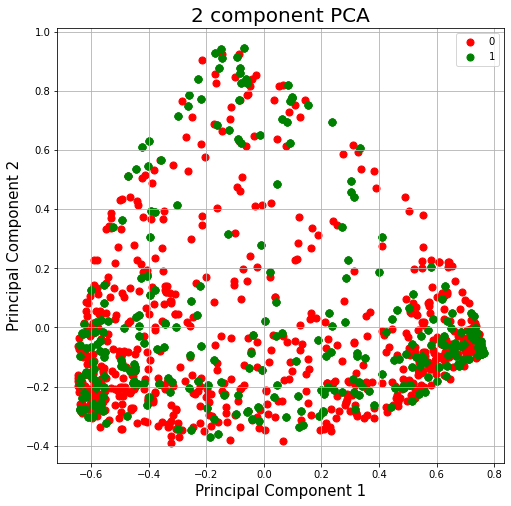

In [26]:
#plotting the results:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf1['Target'] == target
    ax.scatter(principalDf1.loc[indicesToKeep, 'PC1'], principalDf1.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)

# for i in range(0, len(principalDf)):
#     ax.annotate(i, (principalDf['PC1'][i], principalDf['PC2'][i]))
    
ax.grid()

In [27]:
#!pip install plotly
#uncommnet the above line to see the 3d plot of the data

# df = principalDf
# fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
#               color='Target')
# fig.show()

### Hyper parameter tuning of SVM using random search

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40, stratify=y)
 
# DEFINE MODEL AND PERFORMANCE MEASURE
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(0, 10),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train, y_train) 
rand_search.best_estimator_

SVC(C=7.033197579781679, gamma=1.0312187582625605, probability=True,
    random_state=1)

In [29]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=7.033, gamma=1.031, random_state=1))
svm_model.fit(X_train, y_train)
print(svm_model.score(X_test, y_test))
#svm_model.predict(X_test)

0.857421875


#### Plotting the callibration curve to see how the model is callibrated

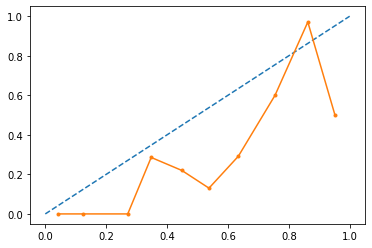

In [30]:
probs = svm_model.decision_function(X_test)
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

#### Callibrating the SVM model to more random probailities distribution

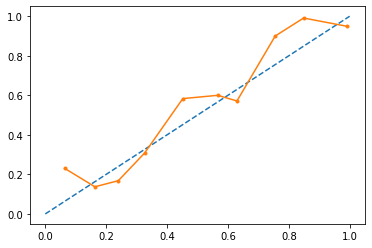

In [31]:
calibrated = CalibratedClassifierCV(svm_model, method='isotonic', cv=5)
calibrated.fit(X_train, y_train)
# predict probabilities
probs = calibrated.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [32]:
# callibrated SVM accuracy
calibrated.score(X_test, y_test)

0.87890625

#### Training KNN also to compare the performance of the model

In [33]:
neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
print(neigh.score(X_test, y_test))
#neigh.predict(X_test)

0.619140625


#### Stochastic gradient boosting

In [34]:
clf1 = GradientBoostingClassifier(n_estimators=50, random_state=10, subsample=0.4, verbose =1).fit(X_train, y_train)
clf1.score(X_test, y_test)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3451           0.0099            0.15s
         2           1.3169           0.0068            0.12s
         3           1.2809           0.0062            0.12s
         4           1.2667           0.0025            0.11s
         5           1.2707           0.0104            0.11s
         6           1.2760           0.0042            0.11s
         7           1.2545           0.0031            0.10s
         8           1.2343           0.0053            0.11s
         9           1.2146           0.0037            0.10s
        10           1.2182           0.0009            0.10s
        20           1.1212          -0.0011            0.07s
        30           1.0315          -0.0002            0.04s
        40           1.0105           0.0002            0.02s
        50           0.9105          -0.0038            0.00s


0.69140625

#### F1, AUC plot and confusion matrix

In [35]:
y_pred = calibrated.predict(X_test)
f1_score(y_test, y_pred, average=None)

array([0.87190083, 0.88518519])

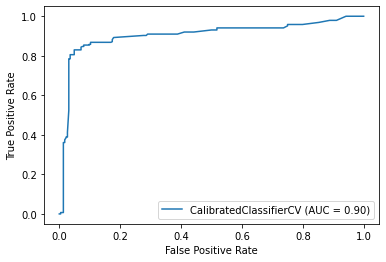

In [36]:
metrics.plot_roc_curve(calibrated, X_test, y_test)  
plt.show()

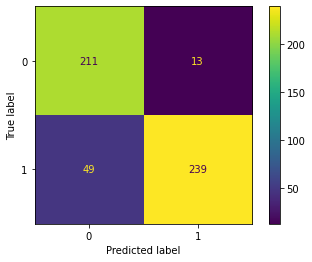

In [37]:
plot_confusion_matrix(calibrated, X_test, y_test)  

Accuracy of Dt: 0.779296875


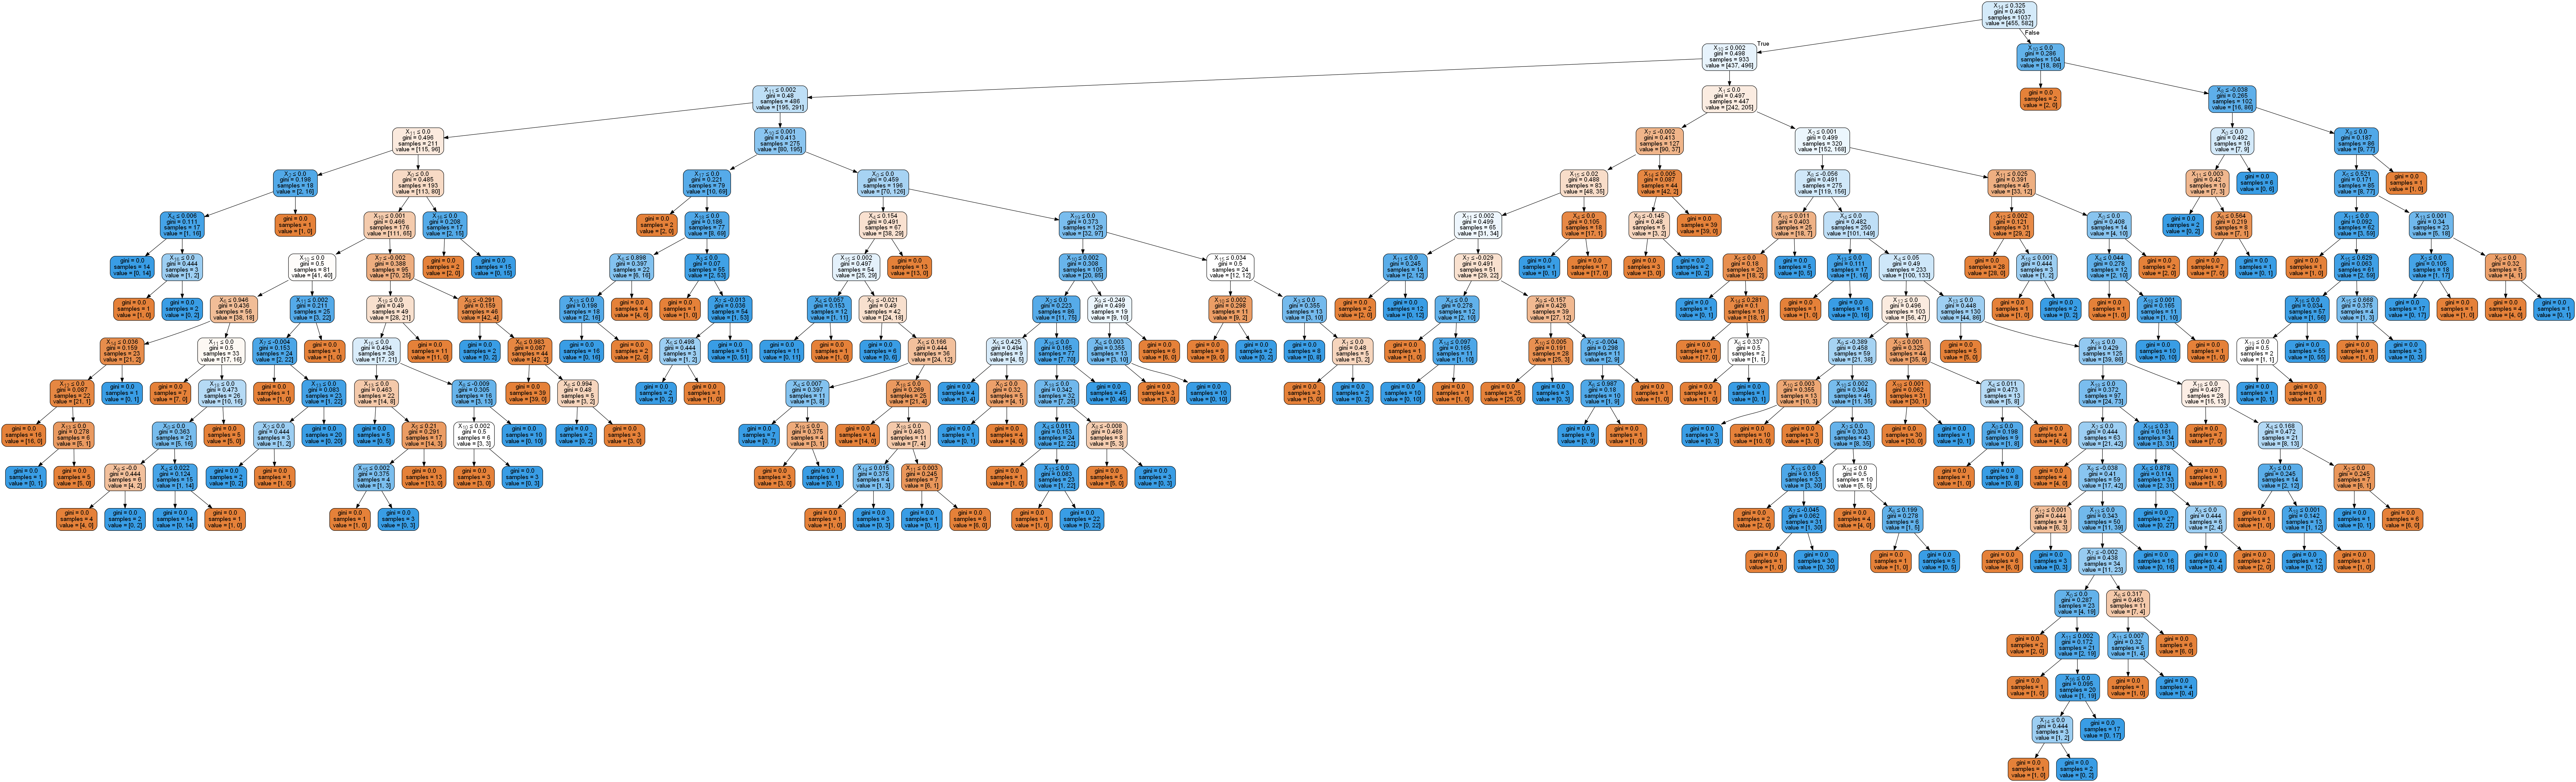

In [38]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image

dt1 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Accuracy of Dt:", dt1.score(X_test, y_test))

sub_tree_1 = dt1

dot_data = export_graphviz(
    sub_tree_1,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=True, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

#### For trainign we only used around 1000 customers but here we are making prediciton on the full data set of 1615 people

In [39]:
col = loan_data.columns.to_numpy()
temp = dfinal[col]
temp.head(2)

Count_CA  Count_SA  Count_MF  Count_CL    ActBal_CA    ActBal_SA  \
Client                                                                     
1              1       NaN       NaN       NaN  1333.802857          NaN   
2              1       1.0       NaN       NaN   110.768571  13326.19036   

        ActBal_MF  ActBal_OVD  ActBal_CC  ActBal_CL  Age  Tenure  \
Client                                                             
1             NaN        -0.0        NaN        NaN   51       7   
2             NaN         NaN        NaN        NaN   43     152   

        TransactionsCred  TransactionsCred_CA    VolumeDeb  \
Client                                                       
1                   25.0                 23.0  1891.353214   
2                    4.0                  3.0   386.442857   

        VolumeDeb_PaymentOrder  TransactionsDeb  TransactionsDeb_CA  \
Client                                                                
1                   247.607143             50.0                30.0   
2                    35.714286              6.0                 6.0   

        TransactionsDebCash_Card  TransactionsDeb_PaymentOrder  
Client                                                          
1                            3.0                           9.0  
2                            2.0                           1.0

In [40]:
# KNN based imputing
X1 = temp.to_numpy()
imputer = KNNImputer(n_neighbors=5, weights="uniform")
X1 = imputer.fit_transform(X1)
X = sklearn.preprocessing.normalize(X1, norm='l2')
#X

### I'm using callibrated SVM here for prediction, if you want, you can replace this model by clf1 (gradient boosting classifier)

In [41]:
yhat = calibrated.predict_proba(X)
client_id = []
client_prob = []

for idx, ele in enumerate(yhat):
    #print(idx, ele, np.argmax(ele))
    if(np.argmax(ele)==1):
            client_id.append(idx)
            client_prob.append(ele[np.argmax(ele)])
    
loan_final = np.stack((client_id, client_prob))
loan_final = np.transpose(loan_final)
loan_final[:3]

array([[14.        ,  0.98426141],
       [22.        ,  0.84639817],
       [81.        ,  0.53381443]])

### Top 100+ customers for loan

In [42]:
ind = np.where(loan_final[:,1]>0.55)
loan_final[ind,0][0], len(loan_final[ind,0][0])

(array([  14.,   22.,  106.,  117.,  126.,  155.,  160.,  171.,  207.,
         214.,  232.,  237.,  238.,  264.,  279.,  292.,  312.,  330.,
         344.,  351.,  357.,  383.,  407.,  412.,  430.,  433.,  438.,
         453.,  494.,  499.,  542.,  573.,  594.,  595.,  600.,  612.,
         613.,  635.,  638.,  642.,  649.,  652.,  661.,  664.,  707.,
         712.,  753.,  774.,  803.,  810.,  825.,  827.,  829.,  842.,
         864.,  872.,  888.,  919.,  937.,  950.,  951.,  978.,  986.,
         998., 1037., 1040., 1051., 1053., 1063., 1068., 1091., 1092.,
        1099., 1111., 1117., 1119., 1199., 1219., 1233., 1245., 1253.,
        1274., 1278., 1287., 1290., 1296., 1314., 1328., 1341., 1346.,
        1349., 1354., 1357., 1402., 1426., 1490., 1537., 1541., 1548.,
        1554., 1566., 1583., 1590., 1591., 1595.]),
 105)

# For Credit Card

We follow the same procedure as we did for the loan one

In [43]:
credit_data_pos = dfinal.loc[dfinal['Sale_CC'] == 1]
credit_data_neg = dfinal.loc[dfinal['Sale_CC'] == 0]
credit_data_pos['Target'] = np.ones(len(credit_data_pos))
credit_data_neg['Target'] = np.zeros(len(credit_data_neg))

fc = credit_data_pos
fc = fc.append(credit_data_neg, ignore_index=True)
fc = fc.append(credit_data_pos, ignore_index=True)
fc = fc.append(credit_data_pos, ignore_index=True)
fc = fc.append(credit_data_pos, ignore_index=True)
fc = fc.drop(columns=["Sale_CC", "Revenue_CC"], axis=1)
fc.head(2)

Count_CA  Count_SA  Count_MF  Count_OVD  Count_CC  Count_CL    ActBal_CA  \
0         1       1.0       NaN        NaN       NaN       NaN  2194.472143   
1         1       1.0       NaN        NaN       NaN       NaN   434.742500   

     ActBal_SA  ActBal_MF  ActBal_OVD  ...  TransactionsDeb_CA  \
0   18302.0625        NaN         NaN  ...                 7.0   
1  173499.8629        NaN         NaN  ...                22.0   

   TransactionsDebCash_Card  TransactionsDebCashless_Card  \
0                       3.0                           1.0   
1                       4.0                          14.0   

   TransactionsDeb_PaymentOrder  Sale_MF  Sale_CL  Revenue_MF  Revenue_CL  \
0                           3.0      0.0      0.0         0.0         0.0   
1                           3.0      0.0      0.0         0.0         0.0   

       Total_Bal  Target  
0   20496.534643     1.0  
1  173934.605400     1.0  

[2 rows x 35 columns]

In [44]:
# finding correlation with target variable and features which have less than 3% correlation are removed
cor = fc.corr()

cols_to_rem = []
for idx, ele in enumerate(cor.iloc[-1,:]):
    #print(ele)
    if np.abs(ele) < 0.05 or np.isnan(ele):
        #print(idx, ele)
        cols_to_rem.append(idx)

print("Cols to be removed", cols_to_rem, len(cols_to_rem))
cor

Cols to be removed [0, 1, 3, 4, 12, 14, 15, 16, 17, 18, 20, 21, 22, 24, 25, 28, 29, 30, 31] 19


Count_CA  Count_SA  Count_MF  Count_OVD  \
Count_CA                      1.000000  0.051528 -0.074156        NaN   
Count_SA                      0.051528  1.000000 -0.017598        NaN   
Count_MF                     -0.074156 -0.017598  1.000000        NaN   
Count_OVD                          NaN       NaN       NaN        NaN   
Count_CC                           NaN       NaN       NaN        NaN   
Count_CL                     -0.074000       NaN       NaN        NaN   
ActBal_CA                    -0.024549  0.079128 -0.049549        NaN   
ActBal_SA                    -0.028103  0.007489  0.308286        NaN   
ActBal_MF                     0.066430  0.058845 -0.013221        NaN   
ActBal_OVD                   -0.033953  0.000835  0.021128        NaN   
ActBal_CC                    -0.048576  0.101349  0.214105        NaN   
ActBal_CL                     0.031746  0.131861  0.321074        NaN   
Sex                          -0.011261 -0.097031  0.075762        NaN   
Age                           0.022064  0.054533 -0.038566        NaN   
Tenure                        0.001515 -0.030686 -0.053420        NaN   
VolumeCred                   -0.039753 -0.056658  0.124194        NaN   
VolumeCred_CA                -0.039556 -0.047368  0.070154        NaN   
TransactionsCred             -0.035950  0.046632 -0.000491        NaN   
TransactionsCred_CA          -0.018364  0.021337  0.013563        NaN   
VolumeDeb                    -0.039970 -0.058655  0.225310        NaN   
VolumeDeb_CA                 -0.046022 -0.064509  0.234995        NaN   
VolumeDebCash_Card           -0.026839  0.005549  0.015704        NaN   
VolumeDebCashless_Card       -0.045423 -0.029707 -0.001421        NaN   
VolumeDeb_PaymentOrder       -0.035147 -0.066531  0.319298        NaN   
TransactionsDeb              -0.016162  0.027274  0.074712        NaN   
TransactionsDeb_CA           -0.005149 -0.030387  0.131785        NaN   
TransactionsDebCash_Card      0.025904 -0.036305  0.015862        NaN   
TransactionsDebCashless_Card -0.024668  0.011016  0.095159        NaN   
TransactionsDeb_PaymentOrder -0.018995  0.010466  0.057412        NaN   
Sale_MF                      -0.021130 -0.078181  0.250329        NaN   
Sale_CL                       0.027072  0.131648  0.087991        NaN   
Revenue_MF                   -0.013267  0.164280  0.190234        NaN   
Revenue_CL                    0.009460  0.065114  0.039516        NaN   
Total_Bal                     0.002461  0.045555  0.139642        NaN   
Target                       -0.038364  0.001051 -0.119987        NaN   

                              Count_CC  Count_CL  ActBal_CA  ActBal_SA  \
Count_CA                           NaN -0.074000  -0.024549  -0.028103   
Count_SA                           NaN       NaN   0.079128   0.007489   
Count_MF                           NaN       NaN  -0.049549   0.308286   
Count_OVD                          NaN       NaN        NaN        NaN   
Count_CC                           NaN       NaN        NaN        NaN   
Count_CL                           NaN  1.000000  -0.091059        NaN   
ActBal_CA                          NaN -0.091059   1.000000  -0.017435   
ActBal_SA                          NaN       NaN  -0.017435   1.000000   
ActBal_MF                          NaN       NaN  -0.016527  -0.020994   
ActBal_OVD                         NaN -0.436081   0.091491   0.000874   
ActBal_CC                          NaN  0.292682  -0.062991   0.087014   
ActBal_CL                          NaN -0.318547   0.169327   0.484271   
Sex                                NaN  0.153957   0.052107   0.029706   
Age                                NaN -0.132859  -0.074996   0.025583   
Tenure                             NaN -0.186876   0.102351  -0.144909   
VolumeCred                         NaN  0.538470   0.001485   0.242020   
VolumeCred_CA                      NaN  0.490323  -0.008591   0.084602   
TransactionsCred                   NaN  0.055369   0.163716  -0.09754

In [45]:
credit = fc.drop(columns=fc.columns[cols_to_rem], axis=1)
credit.head(2)

Count_MF  Count_CL    ActBal_CA    ActBal_SA  ActBal_MF  ActBal_OVD  \
0       NaN       NaN  2194.472143   18302.0625        NaN         NaN   
1       NaN       NaN   434.742500  173499.8629        NaN         NaN   

   ActBal_CC  ActBal_CL  Age   VolumeDeb  VolumeDeb_PaymentOrder  \
0        NaN        NaN   27  221.428571              103.571429   
1        NaN        NaN   24  505.653571               64.285714   

   TransactionsDebCash_Card  TransactionsDebCashless_Card  Revenue_CL  \
0                       3.0                           1.0         0.0   
1                       4.0                          14.0         0.0   

       Total_Bal  Target  
0   20496.534643     1.0  
1  173934.605400     1.0

In [46]:
credit.corr()

Count_MF  Count_CL  ActBal_CA  ActBal_SA  \
Count_MF                      1.000000       NaN  -0.049549   0.308286   
Count_CL                           NaN  1.000000  -0.091059        NaN   
ActBal_CA                    -0.049549 -0.091059   1.000000  -0.017435   
ActBal_SA                     0.308286       NaN  -0.017435   1.000000   
ActBal_MF                    -0.013221       NaN  -0.016527  -0.020994   
ActBal_OVD                    0.021128 -0.436081   0.091491   0.000874   
ActBal_CC                     0.214105  0.292682  -0.062991   0.087014   
ActBal_CL                     0.321074 -0.318547   0.169327   0.484271   
Age                          -0.038566 -0.132859  -0.074996   0.025583   
VolumeDeb                     0.225310  0.508551  -0.005478   0.348544   
VolumeDeb_PaymentOrder        0.319298  0.160002  -0.034549   0.342236   
TransactionsDebCash_Card      0.015862 -0.019326   0.035365  -0.026702   
TransactionsDebCashless_Card  0.095159 -0.003321   0.078205  -0.047547   
Revenue_CL                    0.039516  0.145574  -0.027799   0.015673   
Total_Bal                     0.139642 -0.071841   0.175471   0.706813   
Target                       -0.119987 -0.072749   0.147557   0.191716   

                              ActBal_MF  ActBal_OVD  ActBal_CC  ActBal_CL  \
Count_MF                      -0.013221    0.021128   0.214105   0.321074   
Count_CL                            NaN   -0.436081   0.292682  -0.318547   
ActBal_CA                     -0.016527    0.091491  -0.062991   0.169327   
ActBal_SA                     -0.020994    0.000874   0.087014   0.484271   
ActBal_MF                      1.000000    0.083378   0.182148   0.353144   
ActBal_OVD                     0.083378    1.000000  -0.016919   0.370700   
ActBal_CC                      0.182148   -0.016919   1.000000  -0.115790   
ActBal_CL                      0.353144    0.370700  -0.115790   1.000000   
Age                            0.028498   -0.037927  -0.030875   0.094274   
VolumeDeb                      0.025914    0.083438  -0.080472  -0.358520   
VolumeDeb_PaymentOrder        -0.010909    0.062979  -0.093123  -0.103864   
TransactionsDebCash_Card       0.004438    0.093342   0.120304  -0.076551   
TransactionsDebCashless_Card   0.029496    0.016768  -0.090133  -0.114304   
Revenue_CL                     0.193472   -0.015773   0.203846  -0.137960   
Total_Bal                      0.785971    0.079053   0.127686   0.177391   
Target                        -0.103212    0.102596   0.097323   0.051485   

                                   Age  VolumeDeb  VolumeDeb_PaymentOrder  \
Count_MF                     -0.038566   0.225310                0.319298   
Count_CL                     -0.132859   0.508551                0.160002   
ActBal_CA                    -0.074996  -0.005478               -0.034549   
ActBal_SA                     0.025583   0.348544                0.342236   
ActBal_MF                     0.028498   0.025914               -0.010909   
ActBal_OVD                   -0.037927   0.083438                0.062979   
ActBal_CC                    -0.030875  -0.080472               -0.093123   
ActBal_CL                     0.094274  -0.358520               -0.103864   
Age                           1.000000  -0.008037               -0.031957   
VolumeDeb                    -0.008037   1.000000                0.878615   
VolumeDeb_PaymentOrder       -0.031957   0.878615                1.000000   
TransactionsDebCash_Card     -0.051954   0.026742               -0.048996   
TransactionsDebCashless_Card -0.027972   0.219742                0.166191   
Revenue_CL                   -0.122657   0.072264                0.078304   
Total_Bal                     0.008851   0.177383                0.120829   
Target                        0.056650   0.054666                0.065776   

                              TransactionsDebCash_Card  \
Count_MF                                      0.015862   
Count_CL                           

In [47]:
credit_target = credit['Target']
y = np.array(list(map(int, credit_target)))
credit_data = credit.drop(columns='Target', axis=1)
credit_data.head(2)

Count_MF  Count_CL    ActBal_CA    ActBal_SA  ActBal_MF  ActBal_OVD  \
0       NaN       NaN  2194.472143   18302.0625        NaN         NaN   
1       NaN       NaN   434.742500  173499.8629        NaN         NaN   

   ActBal_CC  ActBal_CL  Age   VolumeDeb  VolumeDeb_PaymentOrder  \
0        NaN        NaN   27  221.428571              103.571429   
1        NaN        NaN   24  505.653571               64.285714   

   TransactionsDebCash_Card  TransactionsDebCashless_Card  Revenue_CL  \
0                       3.0                           1.0         0.0   
1                       4.0                          14.0         0.0   

       Total_Bal  
0   20496.534643  
1  173934.605400

In [48]:
## KNN based imputation

X1 = credit_data.to_numpy()
imputer = KNNImputer(n_neighbors=5, weights="uniform")
X1 = imputer.fit_transform(X1)
X = sklearn.preprocessing.normalize(X1, norm='l2')

In [49]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf2 = pd.DataFrame(data = principalComponents,
             columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principalDf2['Target'] = y
principalDf2.head(2)

PC1       PC2       PC3       PC4       PC5  Target
0  0.704560  0.153940 -0.218824 -0.243876  0.057619       1
1  0.771382  0.352256 -0.270073  0.236919  0.077245       1

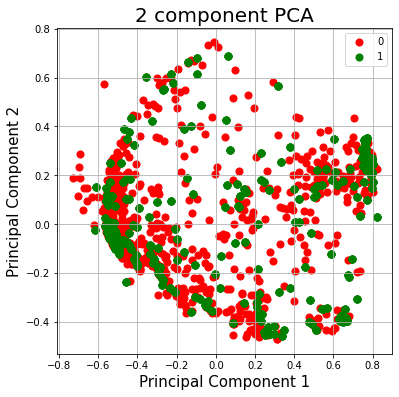

In [50]:
#plotting the results:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf2['Target'] == target
    ax.scatter(principalDf2.loc[indicesToKeep, 'PC1'], principalDf2.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)

# for i in range(0, len(principalDf)):
#     ax.annotate(i, (principalDf['PC1'][i], principalDf['PC2'][i]))
    
ax.grid()

In [51]:
# df = principalDf
# fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
#               color='Target')
# fig.show()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40, stratify=y)

# DEFINE MODEL AND PERFORMANCE MEASURE
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(0, 10),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train, y_train) 
rand_search.best_estimator_

SVC(C=7.033197579781679, gamma=1.0312187582625605, probability=True,
    random_state=1)

In [53]:
svm_model_credit = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=7.033, gamma=1.031, random_state=1))
svm_model_credit.fit(X_train, y_train)
print(svm_model_credit.score(X_test, y_test))

0.9160714285714285


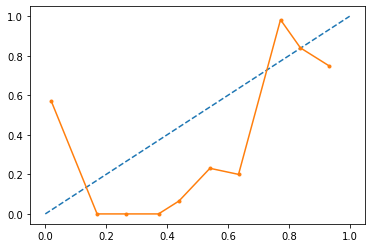

In [54]:
#callibration plot

probs = svm_model_credit.decision_function(X_test)
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

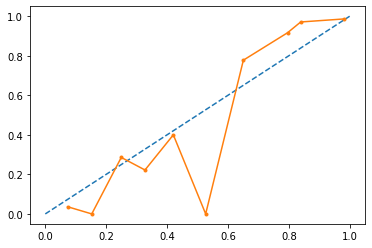

In [55]:
# Callibrating svm calssifier

calibrated_credit = CalibratedClassifierCV(svm_model_credit, method='isotonic', cv=5)
calibrated_credit.fit(X_train, y_train)
# predict probabilities
probs = calibrated_credit.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [56]:
# callibrated SVM
calibrated_credit.score(X_test, y_test)

0.9482142857142857

In [57]:
neigh = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
print(neigh.score(X_test, y_test))

0.6535714285714286


In [58]:
clf2 = GradientBoostingClassifier(n_estimators=10, max_features = 2, random_state=10, subsample=0.4, verbose =1).fit(X_train, y_train)
clf2.score(X_test, y_test)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3348           0.0057            0.02s
         2           1.3331           0.0067            0.02s
         3           1.3259           0.0033            0.01s
         4           1.3447           0.0044            0.01s
         5           1.3173           0.0031            0.01s
         6           1.3116           0.0070            0.01s
         7           1.3073           0.0026            0.00s
         8           1.2717           0.0072            0.00s
         9           1.2537           0.0031            0.00s
        10           1.2860           0.0029            0.00s


0.6392857142857142

In [59]:
y_pred = calibrated_credit.predict(X_test)
f1_score(y_test, y_pred, average=None)

array([0.94093686, 0.95389507])

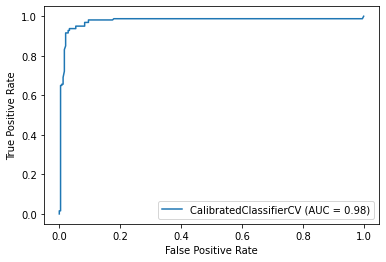

In [60]:
metrics.plot_roc_curve(calibrated_credit, X_test, y_test)  
plt.show()

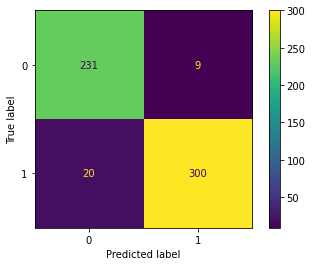

In [61]:
plot_confusion_matrix(calibrated_credit, X_test, y_test)  

Accuracy of Dt: 0.8607142857142858


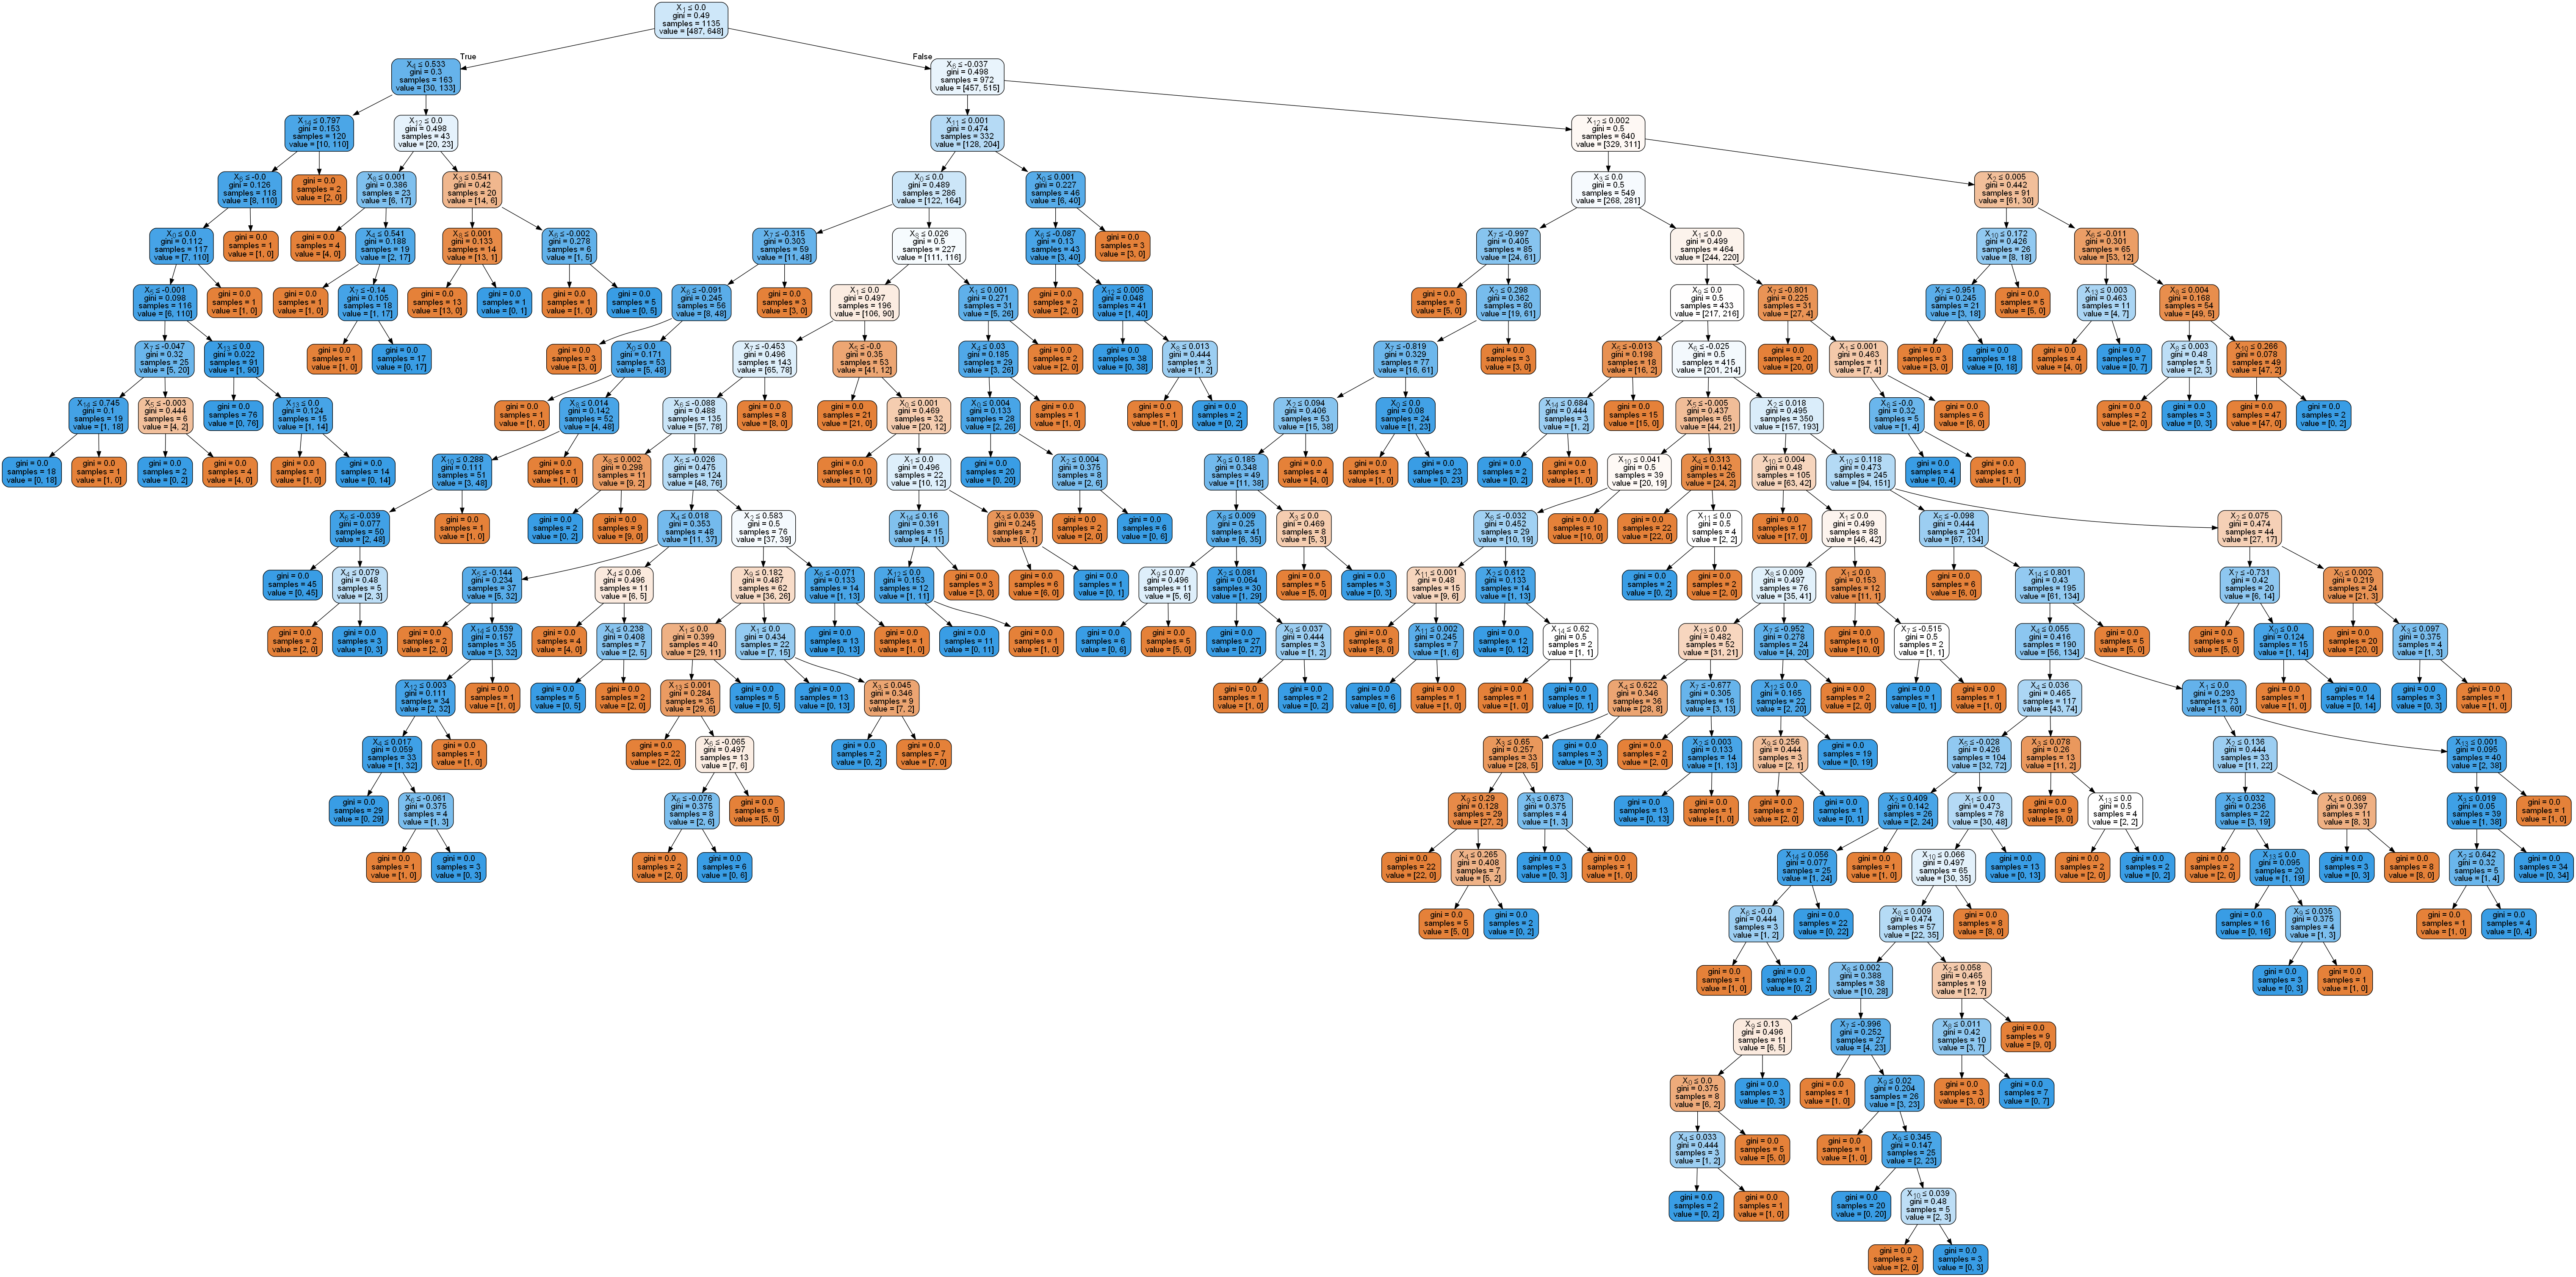

In [62]:
dt2 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Accuracy of Dt:", dt2.score(X_test, y_test))

sub_tree_1 = dt2

dot_data = export_graphviz(
    sub_tree_1,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=True, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Making prediciton for credit card on entire dataset

In [63]:
col = credit_data.columns.to_numpy()
temp = dfinal[col]
temp.head(2)

Count_MF  Count_CL    ActBal_CA    ActBal_SA  ActBal_MF  ActBal_OVD  \
Client                                                                        
1            NaN       NaN  1333.802857          NaN        NaN        -0.0   
2            NaN       NaN   110.768571  13326.19036        NaN         NaN   

        ActBal_CC  ActBal_CL  Age    VolumeDeb  VolumeDeb_PaymentOrder  \
Client                                                                   
1             NaN        NaN   51  1891.353214              247.607143   
2             NaN        NaN   43   386.442857               35.714286   

        TransactionsDebCash_Card  TransactionsDebCashless_Card  Revenue_CL  \
Client                                                                       
1                            3.0                          12.0         0.0   
2                            2.0                           2.0         0.0   

           Total_Bal  
Client                
1        1333.802857  
2       13436.958931

In [64]:
X1 = temp.to_numpy()
imputer = KNNImputer(n_neighbors=5, weights="uniform")
X1 = imputer.fit_transform(X1)
X = sklearn.preprocessing.normalize(X1, norm='l2')
X.shape

(1615, 15)

#### If want higher performance use clf2 gardient boosting classifier

In [65]:
yhat = calibrated_credit.predict_proba(X)
client_id = []
client_prob = []

for idx, ele in enumerate(yhat):
    #print(idx, ele, np.argmax(ele))
    if(np.argmax(ele)==1):
        client_id.append(idx)
        client_prob.append(ele[np.argmax(ele)])

credit_final = np.stack((client_id, client_prob))
credit_final = np.transpose(credit_final)
credit_final[:5]

array([[20.        ,  0.86722771],
       [32.        ,  0.96275762],
       [42.        ,  0.97582936],
       [58.        ,  0.64250447],
       [72.        ,  0.76525172]])

### Top 100 customer for Credit card

In [66]:
ind2 = np.where(credit_final[:,1])
len(credit_final[ind2,0][0]), credit_final[ind2,0][0]

(100,
 array([  20.,   32.,   42.,   58.,   72.,   82.,  100.,  103.,  122.,
         160.,  188.,  209.,  218.,  229.,  274.,  275.,  281.,  333.,
         351.,  378.,  384.,  388.,  419.,  448.,  451.,  454.,  477.,
         524.,  586.,  600.,  616.,  632.,  639.,  647.,  678.,  693.,
         703.,  729.,  738.,  768.,  771.,  796.,  808.,  821.,  907.,
         923.,  926.,  941.,  945.,  962.,  978.,  999., 1026., 1032.,
        1039., 1042., 1044., 1075., 1102., 1128., 1132., 1150., 1152.,
        1164., 1171., 1174., 1175., 1213., 1221., 1240., 1251., 1261.,
        1266., 1276., 1289., 1302., 1305., 1328., 1329., 1332., 1343.,
        1347., 1353., 1367., 1398., 1405., 1407., 1409., 1420., 1424.,
        1435., 1458., 1468., 1470., 1525., 1528., 1537., 1570., 1587.,
        1606.]))

# For Mutual Fund

Same process as for the above two, loan and credit card

In [67]:
mutual_data_pos = dfinal.loc[dfinal['Sale_MF'] == 1]
mutual_data_neg = dfinal.loc[dfinal['Sale_MF'] == 0]
mutual_data_pos['Target'] = np.ones(len(mutual_data_pos))
mutual_data_neg['Target'] = np.zeros(len(mutual_data_neg))

fm = mutual_data_pos
fm = fm.append(mutual_data_neg, ignore_index=True)
fm = fm.append(mutual_data_pos, ignore_index=True)
fm = fm.append(mutual_data_pos, ignore_index=True)
fm = fm.drop(columns=["Sale_MF", "Revenue_MF"], axis=1)
fm.head(2)

Count_CA  Count_SA  Count_MF  Count_OVD  Count_CC  Count_CL    ActBal_CA  \
0         1       NaN       NaN        1.0       NaN       NaN  1333.802857   
1         1       NaN       NaN        1.0       NaN       NaN  1649.980000   

   ActBal_SA  ActBal_MF  ActBal_OVD  ...  TransactionsDeb_CA  \
0        NaN        NaN        -0.0  ...                30.0   
1        NaN        NaN        -0.0  ...                 1.0   

   TransactionsDebCash_Card  TransactionsDebCashless_Card  \
0                       3.0                          12.0   
1                       0.0                           0.0   

   TransactionsDeb_PaymentOrder  Sale_CC  Sale_CL  Revenue_CC  Revenue_CL  \
0                           9.0      0.0      0.0         0.0         0.0   
1                           0.0      0.0      0.0         0.0         0.0   

     Total_Bal  Target  
0  1333.802857     1.0  
1  1649.980000     1.0  

[2 rows x 35 columns]

In [68]:
# finding correlation with target variable and features which have less than 3% correlation are removed
cor = fm.corr()

cols_to_rem = []
for idx, ele in enumerate(cor.iloc[-1,:]):
    #print(ele)
    if np.abs(ele) < 0.05 or np.isnan(ele):
        #print(idx, ele)
        cols_to_rem.append(idx)

print("Cols to be removed", cols_to_rem, len(cols_to_rem))
cor

Cols to be removed [0, 3, 4, 8, 9, 13, 14, 15, 16, 20, 21, 22, 23, 26, 28, 29, 30, 31, 32, 33] 20


Count_CA  Count_SA  Count_MF  Count_OVD  \
Count_CA                      1.000000  0.073603 -0.080694        NaN   
Count_SA                      0.073603  1.000000 -0.078543        NaN   
Count_MF                     -0.080694 -0.078543  1.000000        NaN   
Count_OVD                          NaN       NaN       NaN        NaN   
Count_CC                           NaN       NaN       NaN        NaN   
Count_CL                     -0.085860       NaN       NaN        NaN   
ActBal_CA                    -0.005716  0.080515 -0.030528        NaN   
ActBal_SA                    -0.047123 -0.003135  0.039803        NaN   
ActBal_MF                     0.204795  0.186692 -0.018557        NaN   
ActBal_OVD                    0.028507  0.089426  0.065149        NaN   
ActBal_CC                    -0.035806  0.224618  0.159387        NaN   
ActBal_CL                     0.074565  0.312556  0.101771        NaN   
Sex                           0.073399 -0.079657  0.092071        NaN   
Age                           0.006014  0.115094 -0.104466        NaN   
Tenure                        0.033302 -0.004695 -0.021311        NaN   
VolumeCred                   -0.028845 -0.021126 -0.019450        NaN   
VolumeCred_CA                -0.038713 -0.025717 -0.015162        NaN   
TransactionsCred              0.024034  0.066775 -0.051555        NaN   
TransactionsCred_CA           0.022899  0.029903 -0.012887        NaN   
VolumeDeb                    -0.021730  0.000872 -0.001895        NaN   
VolumeDeb_CA                 -0.041046 -0.029723  0.011169        NaN   
VolumeDebCash_Card           -0.032232 -0.010465  0.053316        NaN   
VolumeDebCashless_Card       -0.045977 -0.029801  0.038594        NaN   
VolumeDeb_PaymentOrder       -0.033731 -0.039425  0.068793        NaN   
TransactionsDeb              -0.010681  0.023209  0.096826        NaN   
TransactionsDeb_CA           -0.016565 -0.028045  0.216281        NaN   
TransactionsDebCash_Card     -0.027700 -0.022685 -0.003898        NaN   
TransactionsDebCashless_Card -0.036908 -0.015393  0.220513        NaN   
TransactionsDeb_PaymentOrder -0.005235 -0.014011  0.075025        NaN   
Sale_CC                      -0.049815 -0.015384 -0.117647        NaN   
Sale_CL                       0.098724  0.139179  0.096364        NaN   
Revenue_CC                   -0.022229 -0.036924 -0.037583        NaN   
Revenue_CL                    0.051145  0.053255  0.104586        NaN   
Total_Bal                     0.102190  0.120223 -0.012103        NaN   
Target                        0.004630 -0.079373  0.249082        NaN   

                              Count_CC  Count_CL  ActBal_CA  ActBal_SA  \
Count_CA                           NaN -0.085860  -0.005716  -0.047123   
Count_SA                           NaN       NaN   0.080515  -0.003135   
Count_MF                           NaN       NaN  -0.030528   0.039803   
Count_OVD                          NaN       NaN        NaN        NaN   
Count_CC                           NaN       NaN        NaN        NaN   
Count_CL                           NaN  1.000000  -0.026915        NaN   
ActBal_CA                          NaN -0.026915   1.000000   0.011804   
ActBal_SA                          NaN       NaN   0.011804   1.000000   
ActBal_MF                          NaN       NaN  -0.015639  -0.036815   
ActBal_OVD                         NaN -0.389346   0.068396  -0.051718   
ActBal_CC                          NaN  0.292589  -0.021722   0.148215   
ActBal_CL                          NaN -0.162187   0.105471   0.273038   
Sex                                NaN  0.139657   0.028537   0.022278   
Age                                NaN -0.084918  -0.027716  -0.019380   
Tenure                             NaN -0.107995   0.058748  -0.063362   
VolumeCred                         NaN  0.235332   0.036226   0.139769   
VolumeCred_CA                      NaN  0.192010   0.019126   0.024591   
TransactionsCred                   NaN  0.073194   0.086266  -0.03084

In [69]:
mutual = fm.drop(columns=fm.columns[cols_to_rem], axis=1)
mutual.head(2)

Count_SA  Count_MF  Count_CL    ActBal_CA  ActBal_SA  ActBal_CC  ActBal_CL  \
0       NaN       NaN       NaN  1333.802857        NaN        NaN        NaN   
1       NaN       NaN       NaN  1649.980000        NaN        NaN        NaN   

   Sex  TransactionsCred  TransactionsCred_CA    VolumeDeb  TransactionsDeb  \
0  0.0              25.0                 23.0  1891.353214             50.0   
1  1.0               4.0                  3.0   425.000000              2.0   

   TransactionsDeb_CA  TransactionsDebCashless_Card  Target  
0                30.0                          12.0     1.0  
1                 1.0                           0.0     1.0

In [70]:
mutual.corr()

Count_SA  Count_MF  Count_CL  ActBal_CA  \
Count_SA                      1.000000 -0.078543       NaN   0.080515   
Count_MF                     -0.078543  1.000000       NaN  -0.030528   
Count_CL                           NaN       NaN  1.000000  -0.026915   
ActBal_CA                     0.080515 -0.030528 -0.026915   1.000000   
ActBal_SA                    -0.003135  0.039803       NaN   0.011804   
ActBal_CC                     0.224618  0.159387  0.292589  -0.021722   
ActBal_CL                     0.312556  0.101771 -0.162187   0.105471   
Sex                          -0.079657  0.092071  0.139657   0.028537   
TransactionsCred              0.066775 -0.051555  0.073194   0.086266   
TransactionsCred_CA           0.029903 -0.012887  0.091805   0.089551   
VolumeDeb                     0.000872 -0.001895  0.199801   0.039004   
TransactionsDeb               0.023209  0.096826  0.008750   0.078420   
TransactionsDeb_CA           -0.028045  0.216281 -0.021701   0.056725   
TransactionsDebCashless_Card -0.015393  0.220513 -0.074674   0.047699   
Target                       -0.079373  0.249082 -0.226815  -0.057245   

                              ActBal_SA  ActBal_CC  ActBal_CL       Sex  \
Count_SA                      -0.003135   0.224618   0.312556 -0.079657   
Count_MF                       0.039803   0.159387   0.101771  0.092071   
Count_CL                            NaN   0.292589  -0.162187  0.139657   
ActBal_CA                      0.011804  -0.021722   0.105471  0.028537   
ActBal_SA                      1.000000   0.148215   0.273038  0.022278   
ActBal_CC                      0.148215   1.000000   0.027683  0.030127   
ActBal_CL                      0.273038   0.027683   1.000000  0.027976   
Sex                            0.022278   0.030127   0.027976  1.000000   
TransactionsCred              -0.030848   0.050287   0.122321  0.029027   
TransactionsCred_CA           -0.018537   0.042553   0.133391  0.028697   
VolumeDeb                      0.247143  -0.047077   0.010293 -0.002808   
TransactionsDeb               -0.007062   0.058879   0.070003  0.001288   
TransactionsDeb_CA             0.026169   0.042404   0.062710 -0.007768   
TransactionsDebCashless_Card  -0.010092   0.019073   0.041045  0.006909   
Target                        -0.115265  -0.055937   0.214706  0.059270   

                              TransactionsCred  TransactionsCred_CA  \
Count_SA                              0.066775             0.029903   
Count_MF                             -0.051555            -0.012887   
Count_CL                              0.073194             0.091805   
ActBal_CA                             0.086266             0.089551   
ActBal_SA                            -0.030848            -0.018537   
ActBal_CC                             0.050287             0.042553   
ActBal_CL                             0.122321             0.133391   
Sex                                   0.029027             0.028697   
TransactionsCred                      1.000000             0.950239   
TransactionsCred_CA                   0.950239             1.000000   
VolumeDeb                             0.259093             0.208040   
TransactionsDeb                       0.725313             0.688963   
TransactionsDeb_CA                    0.505921             0.535913   
TransactionsDebCashless_Card          0.361863             0.331269   
Target                                0.086424             0.094734   

                              VolumeDeb  TransactionsDeb  TransactionsDeb_CA  \
Count_SA                       0.000872         0.023209           -0.028045   
Count_MF                      -0.001895         0.096826            0.216281   
Count_CL                       0.199801         0.008750           -0.021701   
ActBal_CA                      0.039004         0.078420            0.056725   
ActBal_SA                      0.247143        -0.007062            0.026169   
ActBal_CC                     -0.047077    

In [71]:
mutual_target = mutual['Target']
y = np.array(list(map(int, mutual_target)))
mutual_data = mutual.drop(columns='Target', axis=1)
mutual_data.head(2)

Count_SA  Count_MF  Count_CL    ActBal_CA  ActBal_SA  ActBal_CC  ActBal_CL  \
0       NaN       NaN       NaN  1333.802857        NaN        NaN        NaN   
1       NaN       NaN       NaN  1649.980000        NaN        NaN        NaN   

   Sex  TransactionsCred  TransactionsCred_CA    VolumeDeb  TransactionsDeb  \
0  0.0              25.0                 23.0  1891.353214             50.0   
1  1.0               4.0                  3.0   425.000000              2.0   

   TransactionsDeb_CA  TransactionsDebCashless_Card  
0                30.0                          12.0  
1                 1.0                           0.0

In [72]:
X1 = mutual_data.to_numpy()
imputer = KNNImputer(n_neighbors=5, weights="uniform")
X1 = imputer.fit_transform(X1)
X = sklearn.preprocessing.normalize(X1, norm='l2')

In [73]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf3 = pd.DataFrame(data = principalComponents,
             columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
principalDf3['Target'] = y
principalDf3.head(2)

PC1       PC2       PC3       PC4       PC5  Target
0 -0.310897 -0.001218  0.055068 -0.000678 -0.006537       1
1 -0.376527 -0.003418  0.006250  0.067529 -0.001140       1

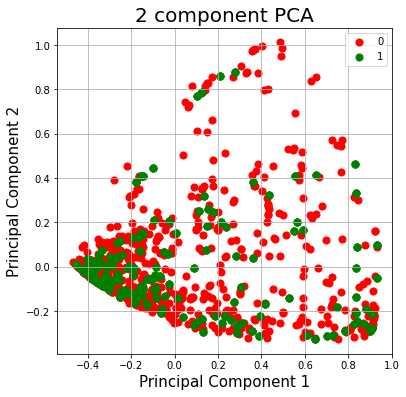

In [74]:
#plotting the results:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf3['Target'] == target
    ax.scatter(principalDf3.loc[indicesToKeep, 'PC1'], principalDf3.loc[indicesToKeep, 'PC2'], c = color, s = 50)
ax.legend(targets)

# for i in range(0, len(principalDf)):
#     ax.annotate(i, (principalDf['PC1'][i], principalDf['PC2'][i]))
    
ax.grid()

In [75]:
# df = principalDf
# fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
#               color='Target')
# fig.show()

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40, stratify=y)

# DEFINE MODEL AND PERFORMANCE MEASURE
mdl = svc(probability = True, random_state = 1)
auc = make_scorer(roc_auc_score)
 
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
rand_list = {"C": stats.uniform(0, 10),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(mdl, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017, scoring = auc) 
rand_search.fit(X_train, y_train) 
rand_search.best_estimator_

SVC(C=4.3765532905229225, gamma=0.8668440989734274, probability=True,
    random_state=1)

In [77]:
svm_model_mutual = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=4.3765, gamma=0.8668, random_state=1))
svm_model_mutual.fit(X_train, y_train)
print(svm_model_mutual.score(X_test, y_test))

0.8035714285714286


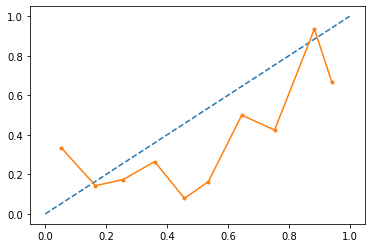

In [78]:
#calibration plot

probs = svm_model_mutual.decision_function(X_test)
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

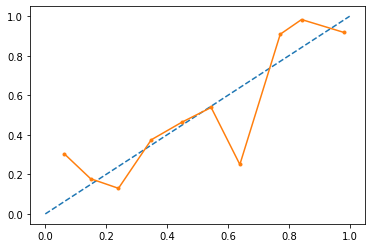

In [79]:
# calibration SVM model

calibrated_mutual = CalibratedClassifierCV(svm_model_mutual, method='isotonic', cv=5)
calibrated_mutual.fit(X_train, y_train)
# predict probabilities
probs = calibrated_mutual.predict_proba(X_test)[:, 1]
# reliability diagram
fop, mpv = calibration_curve(y_test, probs, n_bins=10, normalize=True)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot calibrated reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

In [80]:
# callibrated SVM
calibrated_mutual.score(X_test, y_test)

0.8125

In [81]:
neigh = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
print(neigh.score(X_test, y_test))

0.5580357142857143


In [82]:
clf3 = GradientBoostingClassifier(n_estimators=20, max_features = 2,random_state=10, subsample=0.4, verbose =1).fit(X_train, y_train)
clf3.score(X_test, y_test)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3402           0.0016            0.02s
         2           1.3191           0.0030            0.03s
         3           1.3070           0.0058            0.02s
         4           1.2986           0.0033            0.02s
         5           1.3064           0.0084            0.02s
         6           1.2973           0.0043            0.02s
         7           1.2726           0.0012            0.02s
         8           1.2739           0.0016            0.02s
         9           1.2372           0.0027            0.01s
        10           1.2878           0.0031            0.01s
        20           1.1908          -0.0008            0.00s


0.625

In [83]:
y_pred = calibrated_mutual.predict(X_test)
f1_score(y_test, y_pred, average=None)

array([0.85211268, 0.74390244])

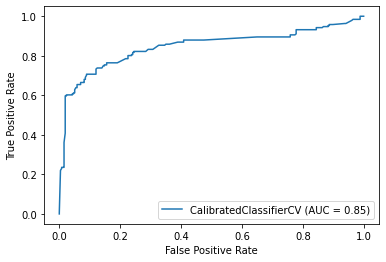

In [84]:
metrics.plot_roc_curve(calibrated_mutual, X_test, y_test)  
plt.show()

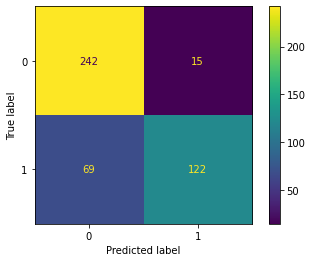

In [85]:
plot_confusion_matrix(calibrated_mutual, X_test, y_test)  

Accuracy of Dt: 0.8169642857142857


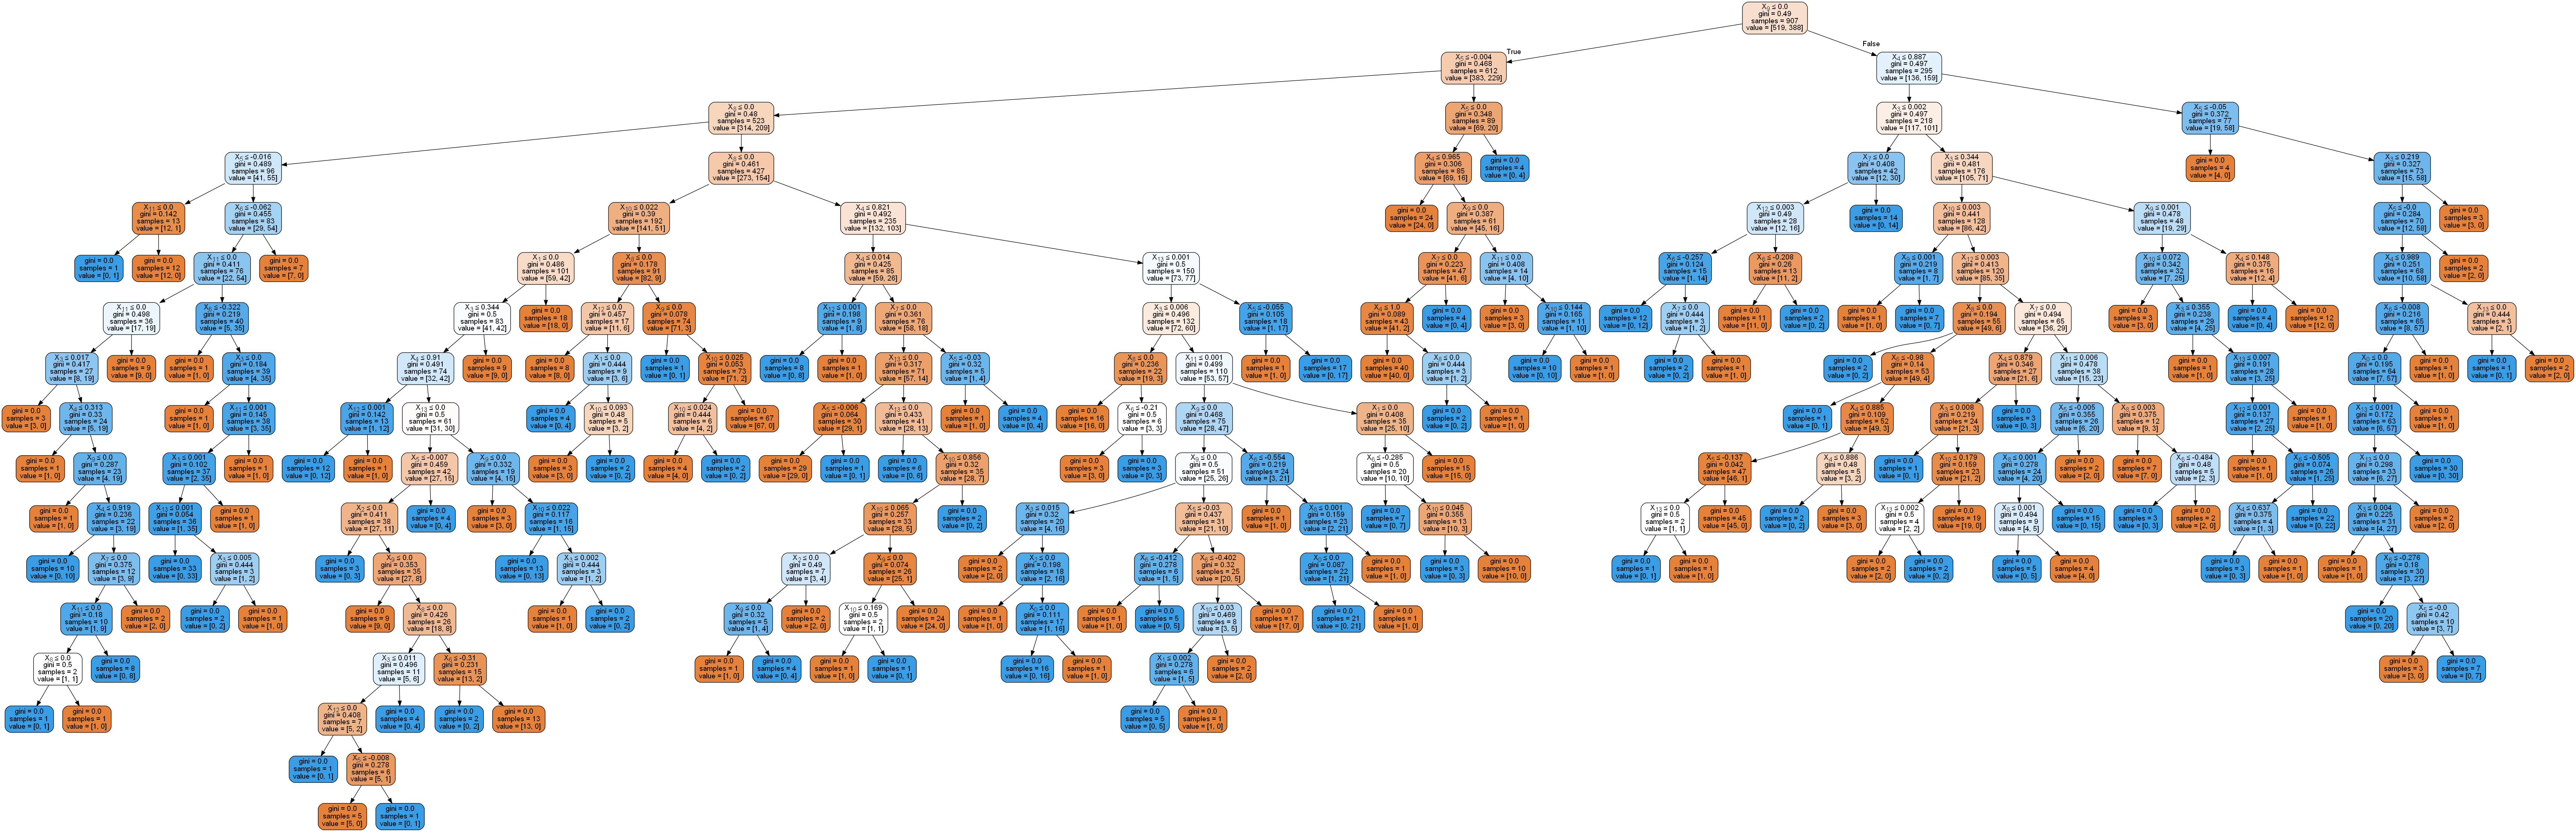

In [86]:
dt3 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
print("Accuracy of Dt:", dt3.score(X_test, y_test))

sub_tree_1 = dt3

dot_data = export_graphviz(
    sub_tree_1,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=True, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

#### Making prediciton on entire 1615 people

In [87]:
col = mutual_data.columns.to_numpy()
temp = dfinal[col]
temp.head(2)

Count_SA  Count_MF  Count_CL    ActBal_CA    ActBal_SA  ActBal_CC  \
Client                                                                      
1            NaN       NaN       NaN  1333.802857          NaN        NaN   
2            1.0       NaN       NaN   110.768571  13326.19036        NaN   

        ActBal_CL  Sex  TransactionsCred  TransactionsCred_CA    VolumeDeb  \
Client                                                                       
1             NaN  0.0              25.0                 23.0  1891.353214   
2             NaN  1.0               4.0                  3.0   386.442857   

        TransactionsDeb  TransactionsDeb_CA  TransactionsDebCashless_Card  
Client                                                                     
1                  50.0                30.0                          12.0  
2                   6.0                 6.0                           2.0

In [88]:
X1 = temp.to_numpy()
imputer = KNNImputer(n_neighbors=5, weights="uniform")
X1 = imputer.fit_transform(X1)
X = sklearn.preprocessing.normalize(X1, norm='l2')

#### If want higher performance, use clf3

In [89]:
yhat = calibrated_mutual.predict_proba(X)
client_id = []
client_prob = []

for idx, ele in enumerate(yhat):
    #print(idx, ele, np.argmax(ele))
    if(np.argmax(ele)==1):
        client_id.append(idx)
        client_prob.append(ele[np.argmax(ele)])

mutual_final = np.stack((client_id, client_prob))
mutual_final = np.transpose(mutual_final)
print(mutual_final[:3])

[[38.          0.64971116]
 [40.          0.56476597]
 [47.          0.52356527]]


### Top 100 customer for credit card

In [90]:
ind3 = np.where(mutual_final[:,1])
print(len(mutual_final[ind3,0][0]), mutual_final[ind3,0][0])

101 [  38.   40.   47.   68.   74.   86.  103.  116.  129.  150.  151.  154.
  156.  187.  222.  224.  235.  255.  306.  318.  343.  354.  355.  362.
  371.  374.  379.  393.  397.  415.  424.  427.  499.  530.  547.  556.
  597.  623.  626.  632.  642.  651.  672.  685.  692.  744.  774.  778.
  781.  802.  832.  860.  863.  878.  890.  906.  912.  940.  955.  992.
 1039. 1048. 1065. 1077. 1088. 1103. 1110. 1113. 1125. 1142. 1150. 1178.
 1192. 1201. 1219. 1224. 1231. 1248. 1252. 1261. 1271. 1272. 1276. 1280.
 1296. 1300. 1325. 1342. 1399. 1407. 1409. 1418. 1419. 1429. 1472. 1481.
 1513. 1531. 1536. 1597. 1598.]


#### finding the common customers among the tree list so that no custeomer is contacted twice

In [91]:
#mutual_final[ind,0][0], credit_final[ind,0][0], credit_final[ind,0][0]

def IntersecOfSets(arr1, arr2, arr3):
    # Converting the arrays into sets
    s1 = set(arr1)
    s2 = set(arr2)
    s3 = set(arr3)
      
    # Calculates intersection of 
    # sets on s1 and s2
    set1 = s1.intersection(s2)         #[80, 20, 100]
      
    # Calculates intersection of sets
    # on set1 and s3
    result_set = set1.intersection(s3)
      
    # Converts resulting set to list
    final_list = list(result_set)
    print(final_list)
    
    return final_list
    
    
common = IntersecOfSets(loan_final[ind,0][0], credit_final[ind2,0][0], mutual_final[ind3,0][0], )

[]


## potential customers for loan, credict card and mutual fund

In [92]:
loan = loan_final[ind,0][0]
print(len(loan), loan)

105 [  14.   22.  106.  117.  126.  155.  160.  171.  207.  214.  232.  237.
  238.  264.  279.  292.  312.  330.  344.  351.  357.  383.  407.  412.
  430.  433.  438.  453.  494.  499.  542.  573.  594.  595.  600.  612.
  613.  635.  638.  642.  649.  652.  661.  664.  707.  712.  753.  774.
  803.  810.  825.  827.  829.  842.  864.  872.  888.  919.  937.  950.
  951.  978.  986.  998. 1037. 1040. 1051. 1053. 1063. 1068. 1091. 1092.
 1099. 1111. 1117. 1119. 1199. 1219. 1233. 1245. 1253. 1274. 1278. 1287.
 1290. 1296. 1314. 1328. 1341. 1346. 1349. 1354. 1357. 1402. 1426. 1490.
 1537. 1541. 1548. 1554. 1566. 1583. 1590. 1591. 1595.]


In [93]:
credit = credit_final[ind2,0][0]
print(len(credit), credit)

100 [  20.   32.   42.   58.   72.   82.  100.  103.  122.  160.  188.  209.
  218.  229.  274.  275.  281.  333.  351.  378.  384.  388.  419.  448.
  451.  454.  477.  524.  586.  600.  616.  632.  639.  647.  678.  693.
  703.  729.  738.  768.  771.  796.  808.  821.  907.  923.  926.  941.
  945.  962.  978.  999. 1026. 1032. 1039. 1042. 1044. 1075. 1102. 1128.
 1132. 1150. 1152. 1164. 1171. 1174. 1175. 1213. 1221. 1240. 1251. 1261.
 1266. 1276. 1289. 1302. 1305. 1328. 1329. 1332. 1343. 1347. 1353. 1367.
 1398. 1405. 1407. 1409. 1420. 1424. 1435. 1458. 1468. 1470. 1525. 1528.
 1537. 1570. 1587. 1606.]


In [94]:
mutual = mutual_final[ind3,0][0]
print(len(mutual), mutual)

101 [  38.   40.   47.   68.   74.   86.  103.  116.  129.  150.  151.  154.
  156.  187.  222.  224.  235.  255.  306.  318.  343.  354.  355.  362.
  371.  374.  379.  393.  397.  415.  424.  427.  499.  530.  547.  556.
  597.  623.  626.  632.  642.  651.  672.  685.  692.  744.  774.  778.
  781.  802.  832.  860.  863.  878.  890.  906.  912.  940.  955.  992.
 1039. 1048. 1065. 1077. 1088. 1103. 1110. 1113. 1125. 1142. 1150. 1178.
 1192. 1201. 1219. 1224. 1231. 1248. 1252. 1261. 1271. 1272. 1276. 1280.
 1296. 1300. 1325. 1342. 1399. 1407. 1409. 1418. 1419. 1429. 1472. 1481.
 1513. 1531. 1536. 1597. 1598.]


In [95]:
loan = list(loan)
for ele in common:
    try:
        loan.remove(ele)
    except:
        pass
        
top_loan_cust = loan[:100]

In [96]:
credit = list(credit)
for ele in common:
    try:
        credit.remove(ele)
    except:
        pass
top_credit_cust = credit[:100]

In [97]:
top_mutual_cust = mutual[:100]

In [98]:
a1 = dfinal.iloc[top_loan_cust,-2].to_numpy()
a2 = dfinal.iloc[top_credit_cust,-3].to_numpy()
a3 = dfinal.iloc[top_mutual_cust,-4].to_numpy()

In [99]:
#Top 100 loan candidates
print("Top loan candidates:", top_loan_cust)

Top loan candidates: [14.0, 22.0, 106.0, 117.0, 126.0, 155.0, 160.0, 171.0, 207.0, 214.0, 232.0, 237.0, 238.0, 264.0, 279.0, 292.0, 312.0, 330.0, 344.0, 351.0, 357.0, 383.0, 407.0, 412.0, 430.0, 433.0, 438.0, 453.0, 494.0, 499.0, 542.0, 573.0, 594.0, 595.0, 600.0, 612.0, 613.0, 635.0, 638.0, 642.0, 649.0, 652.0, 661.0, 664.0, 707.0, 712.0, 753.0, 774.0, 803.0, 810.0, 825.0, 827.0, 829.0, 842.0, 864.0, 872.0, 888.0, 919.0, 937.0, 950.0, 951.0, 978.0, 986.0, 998.0, 1037.0, 1040.0, 1051.0, 1053.0, 1063.0, 1068.0, 1091.0, 1092.0, 1099.0, 1111.0, 1117.0, 1119.0, 1199.0, 1219.0, 1233.0, 1245.0, 1253.0, 1274.0, 1278.0, 1287.0, 1290.0, 1296.0, 1314.0, 1328.0, 1341.0, 1346.0, 1349.0, 1354.0, 1357.0, 1402.0, 1426.0, 1490.0, 1537.0, 1541.0, 1548.0, 1554.0]


In [100]:
#Top 100 credit card candidates
print("Top credit card candidates:", top_credit_cust)

Top credit card candidates: [20.0, 32.0, 42.0, 58.0, 72.0, 82.0, 100.0, 103.0, 122.0, 160.0, 188.0, 209.0, 218.0, 229.0, 274.0, 275.0, 281.0, 333.0, 351.0, 378.0, 384.0, 388.0, 419.0, 448.0, 451.0, 454.0, 477.0, 524.0, 586.0, 600.0, 616.0, 632.0, 639.0, 647.0, 678.0, 693.0, 703.0, 729.0, 738.0, 768.0, 771.0, 796.0, 808.0, 821.0, 907.0, 923.0, 926.0, 941.0, 945.0, 962.0, 978.0, 999.0, 1026.0, 1032.0, 1039.0, 1042.0, 1044.0, 1075.0, 1102.0, 1128.0, 1132.0, 1150.0, 1152.0, 1164.0, 1171.0, 1174.0, 1175.0, 1213.0, 1221.0, 1240.0, 1251.0, 1261.0, 1266.0, 1276.0, 1289.0, 1302.0, 1305.0, 1328.0, 1329.0, 1332.0, 1343.0, 1347.0, 1353.0, 1367.0, 1398.0, 1405.0, 1407.0, 1409.0, 1420.0, 1424.0, 1435.0, 1458.0, 1468.0, 1470.0, 1525.0, 1528.0, 1537.0, 1570.0, 1587.0, 1606.0]


In [101]:
#Top 100 Mutual fund candidates
print("Top mutual fund candidates:", top_mutual_cust)

Top mutual fund candidates: [  38.   40.   47.   68.   74.   86.  103.  116.  129.  150.  151.  154.
  156.  187.  222.  224.  235.  255.  306.  318.  343.  354.  355.  362.
  371.  374.  379.  393.  397.  415.  424.  427.  499.  530.  547.  556.
  597.  623.  626.  632.  642.  651.  672.  685.  692.  744.  774.  778.
  781.  802.  832.  860.  863.  878.  890.  906.  912.  940.  955.  992.
 1039. 1048. 1065. 1077. 1088. 1103. 1110. 1113. 1125. 1142. 1150. 1178.
 1192. 1201. 1219. 1224. 1231. 1248. 1252. 1261. 1271. 1272. 1276. 1280.
 1296. 1300. 1325. 1342. 1399. 1407. 1409. 1418. 1419. 1429. 1472. 1481.
 1513. 1531. 1536. 1597.]


In [102]:
cnt = 0
a1_ = 0
for ele in a1:
    if not np.isnan(ele):
        a1_ += ele
        cnt += 1
        
print("Average revenue from loan: ", a1_/cnt)


Average revenue from loan:  8.513015221967214


In [103]:
cnt2 = 0
a2_ = 0
for ele in a2:
    if not np.isnan(ele):
        a2_ += ele
        cnt2 += 1
        
print("Average revenue from credit card: ", a2_/cnt2)


Average revenue from credit card:  5.981292756619718


In [104]:
cnt3 = 0
a3_ = 0
for ele in a3:
    if not np.isnan(ele):
        a3_ += ele
        cnt3 += 1

print("Average revenue from Mutual Fund: ", a3_/cnt3)


Average revenue from Mutual Fund:  4.176428571387096


### Total Revenue

In [105]:
total_rev = a1_ + a2_ + a3_ + ((100-cnt)*a1_/cnt) + ((100-cnt2)*a2_/cnt2) + ((100-cnt3)*a3_/cnt3)
print("Total Revenue:", total_rev)

Total Revenue: 1867.0736549974026


## Insights

array([[<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Count_CL'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'ActBal_SA'}>],
       [<AxesSubplot:title={'center':'ActBal_CL'}>, <AxesSubplot:>]],
      dtype=object)

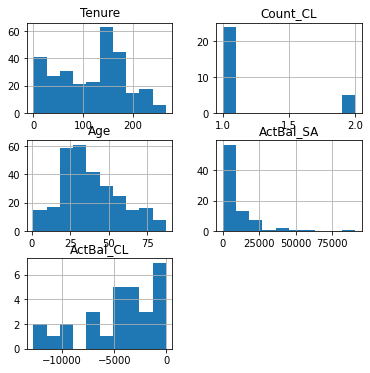

In [106]:
# Top 5 most correlated features to buying loan
v1 = loan_data_pos.loc[:, ["Tenure", "Count_CL", "Age", "ActBal_SA", "ActBal_CL"]]
## Tenure, Count_CL, Age, ActBal_SA

#plotting the histograms
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
v1.hist(ax=ax)

array([[<AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Count_CL'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'ActBal_SA'}>],
       [<AxesSubplot:title={'center':'ActBal_CL'}>, <AxesSubplot:>]],
      dtype=object)

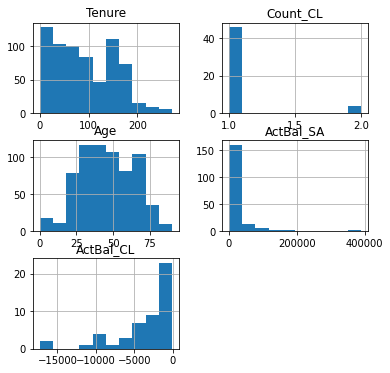

In [107]:
r1 = loan_data_neg.loc[:, ["Tenure", "Count_CL", "Age", "ActBal_SA", "ActBal_CL"]]
## Tenure, Count_CL, Age, ActBal_SA

#plotting the histograms
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
r1.hist(ax=ax)

#### After Age 30 tendency to buy loan starts decreasing, 
#### If CL liability> 15000 person is not going to take loan, 
#### People with less ActBal_SA are more likely to buy loan, if it goes above 100000 they is very less chance that they will buy loan

array([[<AxesSubplot:title={'center':'Count_MF'}>,
        <AxesSubplot:title={'center':'ActBal_CA'}>],
       [<AxesSubplot:title={'center':'ActBal_SA'}>,
        <AxesSubplot:title={'center':'ActBal_MF'}>],
       [<AxesSubplot:title={'center':'ActBal_OVD'}>, <AxesSubplot:>]],
      dtype=object)

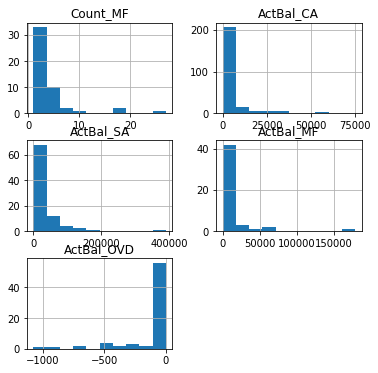

In [108]:
# Top 5 most correlated features to buying credit card
v2 = credit_data_pos.loc[:, ["Count_MF", "ActBal_CA", "ActBal_SA", "ActBal_MF", "ActBal_OVD"]]
## Tenure, Count_CL, Age, ActBal_SA

#plotting the histograms
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
v2.hist(ax=ax)

array([[<AxesSubplot:title={'center':'Count_MF'}>,
        <AxesSubplot:title={'center':'ActBal_CA'}>],
       [<AxesSubplot:title={'center':'ActBal_SA'}>,
        <AxesSubplot:title={'center':'ActBal_MF'}>],
       [<AxesSubplot:title={'center':'ActBal_OVD'}>, <AxesSubplot:>]],
      dtype=object)

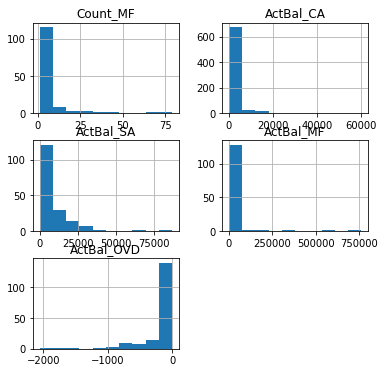

In [109]:
r2 = credit_data_neg.loc[:, ["Count_MF", "ActBal_CA", "ActBal_SA", "ActBal_MF", "ActBal_OVD"]]
## Tenure, Count_CL, Age, ActBal_SA

#plotting the histograms
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
r2.hist(ax=ax)

#### People with ActBal_OVD liabaility of 1500 and above are less likely to buy credit card
#### Increase in Count_MF increases the chances of buyinh credit card
#### People who are not interested in credit card doesn't have more than 75000 ActBal_SA
#### Peopl with ActBal_CA > 20000 are interested in buying credit cards

array([[<AxesSubplot:title={'center':'Count_MF'}>,
        <AxesSubplot:title={'center':'Count_CL'}>],
       [<AxesSubplot:title={'center':'TransactionsDebCashless_Card'}>,
        <AxesSubplot:title={'center':'ActBal_CL'}>]], dtype=object)

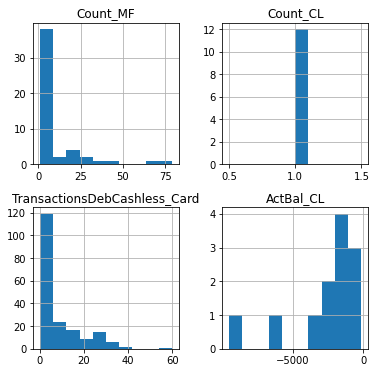

In [110]:
# Top 4 most correlated features to buying mutual funds
v3 = mutual_data_pos.loc[:, ["Count_MF", "Count_CL", "TransactionsDebCashless_Card", "ActBal_CL"]]
## Tenure, Count_CL, Age, ActBal_SA

#plotting the histograms
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
v3.hist(ax=ax)

array([[<AxesSubplot:title={'center':'Count_MF'}>,
        <AxesSubplot:title={'center':'Count_CL'}>],
       [<AxesSubplot:title={'center':'TransactionsDebCashless_Card'}>,
        <AxesSubplot:title={'center':'ActBal_CL'}>]], dtype=object)

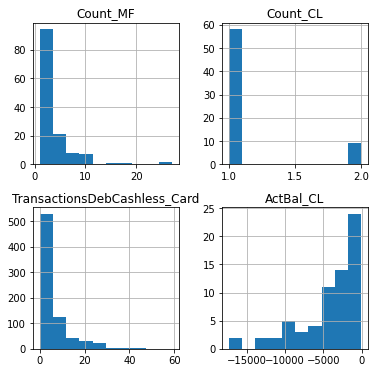

In [111]:
r3 = mutual_data_neg.loc[:, ["Count_MF", "Count_CL", "TransactionsDebCashless_Card", "ActBal_CL"]]
## Tenure, Count_CL, Age, ActBal_SA

#plotting the histograms
fig = plt.figure(figsize = (6,6))
ax = fig.gca()
r3.hist(ax=ax)

#### People with more than 25 mutual funds are highly interested in buying more mutual funds
#### If someone has more than 10000 ActBal_CL liability, they are very unlikely to buy mutual funds
#### People with Count_CL=2 are less likely to buy mutual funds

You should consider upgrading via the 'c:\program files\python37\python.exe -m pip install --upgrade pip' command.
